In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

title_font= {"family": "arial", "weight": "bold", "color": "darkred", "size": 15}
label_font= {"family": "arial", "weight": "bold", "color": "darkblue", "size": 10}

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datas/Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

We have a dataset that collected from WHO. We're gonna do exploratory analysis and apply regression analysis.

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Some columns are not neat. We should delete spaces.

In [6]:
for i in df.columns:
  df.rename(columns={i:i.strip()}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


This is some infos about the dataset.

In [8]:
df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
Status,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.0,59.9,59.9,59.5,59.2,58.8,58.6,58.1,57.5,57.3,57.3
Adult Mortality,263.0,271.0,268.0,272.0,275.0,279.0,281.0,287.0,295.0,295.0,291.0
infant deaths,62,64,66,69,71,74,77,80,82,84,85
Alcohol,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.03,0.02
percentage expenditure,71.279624,73.523582,73.219243,78.184215,7.097109,79.679367,56.762217,25.873925,10.910156,17.171518,1.388648
Hepatitis B,65.0,62.0,64.0,67.0,68.0,66.0,63.0,64.0,63.0,64.0,66.0
Measles,1154,492,430,2787,3013,1989,2861,1599,1141,1990,1296


Detecting Null Datas

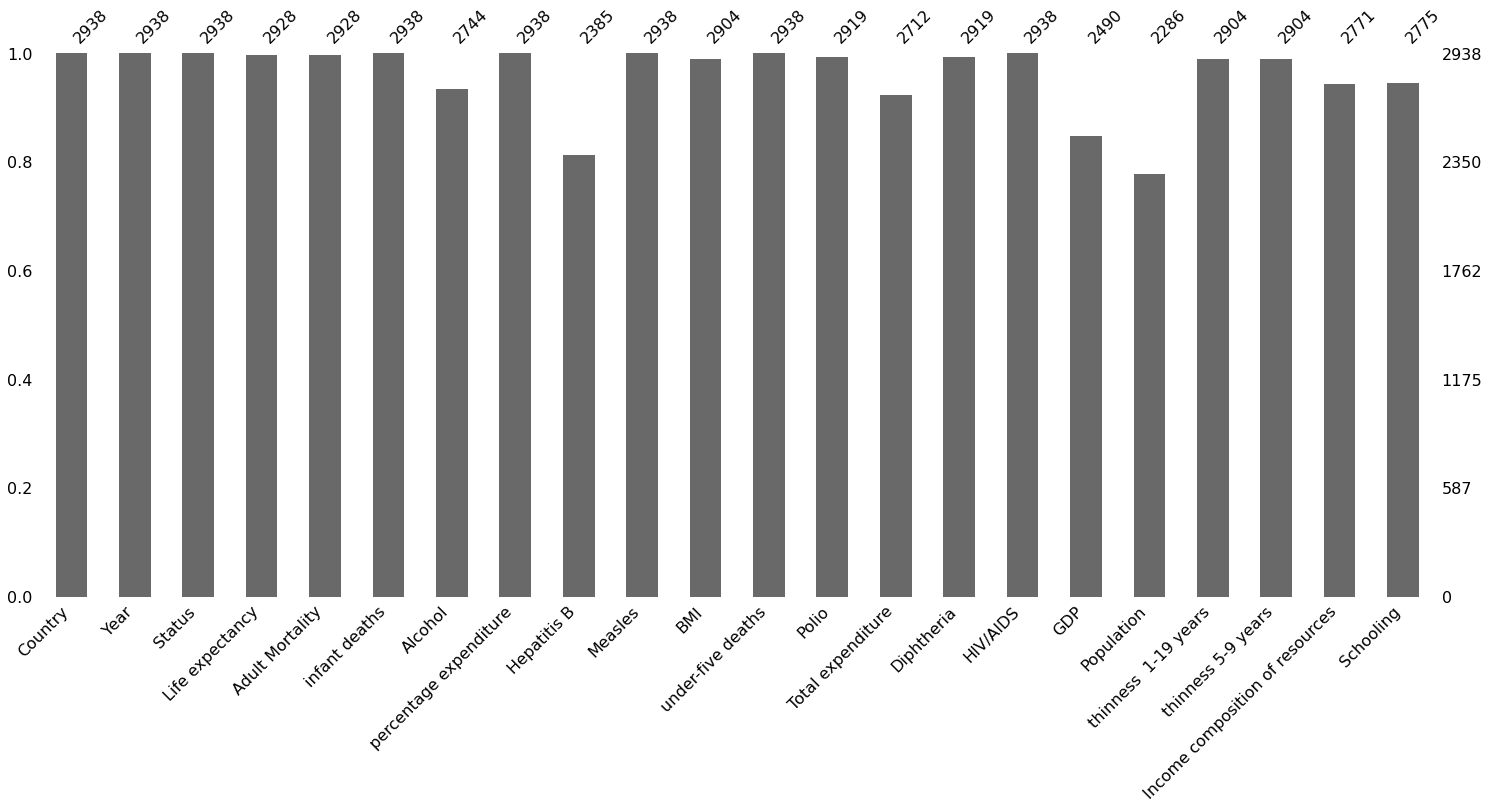

In [9]:
msno.bar(df);

We've used a bar plot from Missingno library. Short columns show that there are some null entries in these columns.

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

These are number of null entries.

In [11]:
zero = df.groupby("Country").sum()
for i in zero.columns:
  disp = zero.loc[lambda x: zero[i]== 0, :]
  display(disp)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Cook Islands,2013,0.0,0.0,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.000000,0.0,0.1,0.1,0.000,0.0
Dominica,2013,0.0,0.0,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,0.0,2.7,2.6,0.721,12.7
Marshall Islands,2013,0.0,0.0,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,0.0,0.1,0.1,0.000,0.0
Monaco,2013,0.0,0.0,0,0.01,0.000000,99.0,0,0.0,0,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.000,0.0
Nauru,2013,0.0,0.0,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,0.0,0.1,0.1,0.000,9.6
Niue,2013,0.0,0.0,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,0.000000,0.0,0.1,0.1,0.000,0.0
Palau,2013,0.0,0.0,0,0.00,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
Saint Kitts and Nevis,2013,0.0,0.0,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,0.000000,0.0,3.7,3.6,0.749,13.4
San Marino,2013,0.0,0.0,0,0.01,0.000000,69.0,0,0.0,0,69.0,6.50,69.0,0.1,0.000000,0.0,0.0,0.0,0.000,15.1


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Cook Islands,2013,0.0,0.0,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.000000,0.0,0.1,0.1,0.000,0.0
Dominica,2013,0.0,0.0,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,0.0,2.7,2.6,0.721,12.7
Marshall Islands,2013,0.0,0.0,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,0.0,0.1,0.1,0.000,0.0
Monaco,2013,0.0,0.0,0,0.01,0.000000,99.0,0,0.0,0,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.000,0.0
Nauru,2013,0.0,0.0,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,0.0,0.1,0.1,0.000,9.6
Niue,2013,0.0,0.0,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,0.000000,0.0,0.1,0.1,0.000,0.0
Palau,2013,0.0,0.0,0,0.00,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
Saint Kitts and Nevis,2013,0.0,0.0,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,0.000000,0.0,3.7,3.6,0.749,13.4
San Marino,2013,0.0,0.0,0,0.01,0.000000,69.0,0,0.0,0,69.0,6.50,69.0,0.1,0.000000,0.0,0.0,0.0,0.000,15.1


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,32120,1200.9,2040.0,0,119.24,16025.363621,1474.0,0,614.8,0,1551.0,71.87,1573.0,2.0,156148.891650,0.0,54.8,54.0,7.818,141.5
Austria,32120,1303.7,1052.0,0,183.54,78855.027009,1297.0,1236,772.6,0,1376.0,70.73,1388.0,1.6,541239.620940,103598078.0,27.7,31.0,13.798,246.2
Bahamas,32120,1188.6,2433.0,0,154.07,0.000000,1254.0,0,846.1,0,1520.0,100.59,1532.0,1.9,0.000000,0.0,40.8,40.3,11.807,198.8
Bahrain,32120,1211.6,1046.0,0,29.02,9633.394234,1570.0,107,826.5,0,1568.0,57.11,1569.0,1.6,179059.958730,0.0,97.7,95.2,12.927,225.8
Barbados,32120,1189.7,1242.0,0,123.10,6225.231923,1261.0,0,735.6,0,1285.0,91.83,1439.0,4.1,192273.576470,0.0,63.3,62.7,12.327,238.3
Belize,32120,1108.3,2488.0,0,93.79,5853.495837,1516.0,0,602.8,0,1528.0,75.59,1523.0,6.9,62928.194792,2726286.0,56.9,55.8,11.103,199.3
Bosnia and Herzegovina,32120,1215.5,1039.0,0,66.08,3447.319346,860.0,5107,783.4,0,1253.0,131.13,1256.0,1.6,35920.416377,31791889.0,44.5,44.1,7.206,195.6
Brunei Darussalam,32120,1223.8,1073.0,0,5.68,20430.071764,1566.0,117,475.5,0,1560.0,42.30,1549.0,1.6,315916.929630,0.0,99.2,90.8,13.430,225.7
Cabo Verde,32120,1160.3,1859.0,0,51.72,3018.127798,1129.0,2,390.0,0,1350.0,71.33,1264.0,8.5,32376.656628,4681604.0,128.2,127.6,9.120,195.2


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Palau,2013,0.0,0.0,0,0.0,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
South Sudan,32120,862.0,5541.0,444,0.0,131.857231,31.0,5052,0.0,692,220.0,8.13,235.0,59.1,8737.869045,60013234.0,0.0,0.0,2.107,24.5


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Bahamas,32120,1188.6,2433.0,0,154.07,0.0,1254.0,0,846.1,0,1520.0,100.59,1532.0,1.9,0.000000,0.0,40.8,40.3,11.807,198.8
Bolivia (Plurinational State of),32120,1083.3,2840.0,172,48.18,0.0,1326.0,122,717.1,224,1307.0,84.39,1398.0,2.5,0.000000,0.0,20.8,19.0,10.140,223.4
Congo,32120,944.7,5164.0,126,32.60,0.0,457.0,16346,334.8,187,839.0,44.80,884.0,79.8,0.000000,0.0,135.8,130.0,8.453,161.4
Cook Islands,2013,0.0,0.0,0,0.01,0.0,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.000000,0.0,0.1,0.1,0.000,0.0
Czechia,32120,1228.3,1149.0,0,195.39,0.0,1362.0,367,891.4,0,1568.0,105.75,1570.0,1.6,0.000000,0.0,31.9,33.0,0.000,0.0
Côte d'Ivoire,32120,806.2,6677.0,984,42.56,0.0,959.0,27332,341.2,1389,1055.0,85.85,1103.0,75.0,0.000000,0.0,107.8,107.1,0.000,0.0
Democratic People's Republic of Korea,32120,1107.1,2573.0,159,45.00,0.0,1155.0,3561,410.0,205,1572.0,0.00,1332.0,1.6,0.000000,0.0,87.0,87.2,0.000,0.0
Democratic Republic of the Congo,32120,891.0,4246.0,3752,21.36,0.0,462.0,782763,253.4,5176,890.0,53.38,670.0,29.1,0.000000,0.0,130.3,127.3,0.000,0.0
Egypt,32120,1144.0,2730.0,900,2.83,0.0,1547.0,17108,788.2,1082,1547.0,80.19,1547.0,1.6,0.000000,0.0,50.0,49.2,10.362,190.3


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Denmark,32120,1268.1,1057.0,0,160.62,85013.372711,0.0,252,893.2,0,1408.0,117.34,1408.0,1.6,529078.52665,68161302.0,18.6,15.0,14.398,275.1
Finland,32120,1291.4,1102.0,0,143.29,46229.047518,0.0,45,836.8,0,1555.0,129.21,1572.0,1.6,404298.39613,55889317.0,14.4,12.9,13.967,276.7
Hungary,32120,1181.2,2353.0,9,171.41,6029.297284,0.0,33,910.9,14,1583.0,116.53,1584.0,1.6,136218.26930,25678436.0,30.7,30.6,12.869,241.9
Iceland,32120,1319.1,790.0,0,111.99,79865.524935,0.0,0,817.2,0,1436.0,128.19,1436.0,1.6,482552.04652,2978842.0,15.3,14.4,14.165,290.5
Japan,32120,1320.6,914.0,46,105.61,62768.805267,0.0,110013,409.7,64,1536.0,97.09,1540.0,1.6,398280.71655,1558145.0,29.0,24.7,14.025,239.6
Norway,32120,1308.7,1060.0,0,99.75,74541.022690,0.0,101,813.0,0,1489.0,136.29,1407.0,1.6,438959.15085,41830917.0,12.2,11.2,14.903,279.5
Slovenia,32120,1275.7,1223.0,0,161.32,24901.352720,0.0,97,835.2,0,1523.0,132.83,1520.0,1.6,183056.71004,6420465.0,28.3,28.7,13.767,263.6
Switzerland,32120,1317.3,892.0,0,155.07,156828.966040,0.0,6360,823.0,0,1526.0,91.31,1513.0,1.6,917805.99362,94611869.0,8.6,6.3,14.577,246.3
United Kingdom of Great Britain and Northern Ireland,32120,1292.7,1126.0,58,178.10,0.000000,0.0,11452,886.2,65,1486.0,128.01,1486.0,1.6,0.00000,0.0,12.0,8.1,0.000,0.0


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,32120,1200.9,2040.0,0,119.24,16025.363621,1474.0,0,614.8,0,1551.0,71.87,1573.0,2.0,156148.891650,0.0,54.8,54.0,7.818,141.5
Bahamas,32120,1188.6,2433.0,0,154.07,0.000000,1254.0,0,846.1,0,1520.0,100.59,1532.0,1.9,0.000000,0.0,40.8,40.3,11.807,198.8
Barbados,32120,1189.7,1242.0,0,123.10,6225.231923,1261.0,0,735.6,0,1285.0,91.83,1439.0,4.1,192273.576470,0.0,63.3,62.7,12.327,238.3
Belize,32120,1108.3,2488.0,0,93.79,5853.495837,1516.0,0,602.8,0,1528.0,75.59,1523.0,6.9,62928.194792,2726286.0,56.9,55.8,11.103,199.3
Cook Islands,2013,0.0,0.0,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.000000,0.0,0.1,0.1,0.000,0.0
Cuba,32120,1247.6,921.0,16,62.86,5833.021729,1540.0,0,791.4,16,1579.0,96.43,1503.0,1.6,50886.958151,0.0,55.1,52.3,11.874,235.1
Dominica,2013,0.0,0.0,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,0.0,2.7,2.6,0.721,12.7
Grenada,32120,1172.7,2460.0,0,132.65,5821.459677,1432.0,0,643.4,0,1522.0,92.83,1530.0,1.6,100152.276181,0.0,62.7,62.9,3.731,243.3
Guatemala,32120,1147.7,2099.0,210,34.03,5344.432768,958.0,0,647.1,258,1143.0,98.91,1369.0,6.0,37853.351580,94942520.0,21.4,21.4,9.351,157.8


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Monaco,2013,0.0,0.0,0,0.01,0.000000,99.0,0,0.0,0,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.000,0.0
San Marino,2013,0.0,0.0,0,0.01,0.000000,69.0,0,0.0,0,69.0,6.50,69.0,0.1,0.000000,0.0,0.0,0.0,0.000,15.1
South Sudan,32120,862.0,5541.0,444,0.00,131.857231,31.0,5052,0.0,692,220.0,8.13,235.0,59.1,8737.869045,60013234.0,0.0,0.0,2.107,24.5
Sudan,32120,989.2,3845.0,1034,21.87,1563.175083,796.0,49728,0.0,1546,1156.0,85.43,1158.0,4.0,19084.767255,288744242.0,0.0,0.0,7.056,102.0


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,32120,1200.9,2040.0,0,119.24,16025.363621,1474.0,0,614.8,0,1551.0,71.87,1573.0,2.0,156148.891650,0.0,54.8,54.0,7.818,141.5
Austria,32120,1303.7,1052.0,0,183.54,78855.027009,1297.0,1236,772.6,0,1376.0,70.73,1388.0,1.6,541239.620940,103598078.0,27.7,31.0,13.798,246.2
Bahamas,32120,1188.6,2433.0,0,154.07,0.000000,1254.0,0,846.1,0,1520.0,100.59,1532.0,1.9,0.000000,0.0,40.8,40.3,11.807,198.8
Bahrain,32120,1211.6,1046.0,0,29.02,9633.394234,1570.0,107,826.5,0,1568.0,57.11,1569.0,1.6,179059.958730,0.0,97.7,95.2,12.927,225.8
Barbados,32120,1189.7,1242.0,0,123.10,6225.231923,1261.0,0,735.6,0,1285.0,91.83,1439.0,4.1,192273.576470,0.0,63.3,62.7,12.327,238.3
Belize,32120,1108.3,2488.0,0,93.79,5853.495837,1516.0,0,602.8,0,1528.0,75.59,1523.0,6.9,62928.194792,2726286.0,56.9,55.8,11.103,199.3
Bosnia and Herzegovina,32120,1215.5,1039.0,0,66.08,3447.319346,860.0,5107,783.4,0,1253.0,131.13,1256.0,1.6,35920.416377,31791889.0,44.5,44.1,7.206,195.6
Brunei Darussalam,32120,1223.8,1073.0,0,5.68,20430.071764,1566.0,117,475.5,0,1560.0,42.30,1549.0,1.6,315916.929630,0.0,99.2,90.8,13.430,225.7
Cabo Verde,32120,1160.3,1859.0,0,51.72,3018.127798,1129.0,2,390.0,0,1350.0,71.33,1264.0,8.5,32376.656628,4681604.0,128.2,127.6,9.120,195.2


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Democratic People's Republic of Korea,32120,1107.1,2573.0,159,45.00,0.0,1155.0,3561,410.0,205,1572.0,0.0,1332.0,1.6,0.000000,0.0,87.0,87.2,0.0,0.0
Somalia,32120,853.1,5068.0,798,0.15,0.0,126.0,87905,299.0,1289,477.0,0.0,469.0,13.4,892.420035,0.0,116.3,113.3,0.0,0.0


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Bahamas,32120,1188.6,2433.0,0,154.07,0.0,1254.0,0,846.1,0,1520.0,100.59,1532.0,1.9,0.0,0.0,40.8,40.3,11.807,198.8
Bolivia (Plurinational State of),32120,1083.3,2840.0,172,48.18,0.0,1326.0,122,717.1,224,1307.0,84.39,1398.0,2.5,0.0,0.0,20.8,19.0,10.140,223.4
Congo,32120,944.7,5164.0,126,32.60,0.0,457.0,16346,334.8,187,839.0,44.80,884.0,79.8,0.0,0.0,135.8,130.0,8.453,161.4
Cook Islands,2013,0.0,0.0,0,0.01,0.0,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.0,0.0,0.1,0.1,0.000,0.0
Czechia,32120,1228.3,1149.0,0,195.39,0.0,1362.0,367,891.4,0,1568.0,105.75,1570.0,1.6,0.0,0.0,31.9,33.0,0.000,0.0
Côte d'Ivoire,32120,806.2,6677.0,984,42.56,0.0,959.0,27332,341.2,1389,1055.0,85.85,1103.0,75.0,0.0,0.0,107.8,107.1,0.000,0.0
Democratic People's Republic of Korea,32120,1107.1,2573.0,159,45.00,0.0,1155.0,3561,410.0,205,1572.0,0.00,1332.0,1.6,0.0,0.0,87.0,87.2,0.000,0.0
Democratic Republic of the Congo,32120,891.0,4246.0,3752,21.36,0.0,462.0,782763,253.4,5176,890.0,53.38,670.0,29.1,0.0,0.0,130.3,127.3,0.000,0.0
Egypt,32120,1144.0,2730.0,900,2.83,0.0,1547.0,17108,788.2,1082,1547.0,80.19,1547.0,1.6,0.0,0.0,50.0,49.2,10.362,190.3


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,32120,1200.9,2040.0,0,119.24,16025.363621,1474.0,0,614.8,0,1551.0,71.87,1573.0,2.0,156148.891650,0.0,54.8,54.0,7.818,141.5
Bahamas,32120,1188.6,2433.0,0,154.07,0.000000,1254.0,0,846.1,0,1520.0,100.59,1532.0,1.9,0.000000,0.0,40.8,40.3,11.807,198.8
Bahrain,32120,1211.6,1046.0,0,29.02,9633.394234,1570.0,107,826.5,0,1568.0,57.11,1569.0,1.6,179059.958730,0.0,97.7,95.2,12.927,225.8
Barbados,32120,1189.7,1242.0,0,123.10,6225.231923,1261.0,0,735.6,0,1285.0,91.83,1439.0,4.1,192273.576470,0.0,63.3,62.7,12.327,238.3
Bolivia (Plurinational State of),32120,1083.3,2840.0,172,48.18,0.000000,1326.0,122,717.1,224,1307.0,84.39,1398.0,2.5,0.000000,0.0,20.8,19.0,10.140,223.4
Brunei Darussalam,32120,1223.8,1073.0,0,5.68,20430.071764,1566.0,117,475.5,0,1560.0,42.30,1549.0,1.6,315916.929630,0.0,99.2,90.8,13.430,225.7
Congo,32120,944.7,5164.0,126,32.60,0.000000,457.0,16346,334.8,187,839.0,44.80,884.0,79.8,0.000000,0.0,135.8,130.0,8.453,161.4
Cook Islands,2013,0.0,0.0,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.000000,0.0,0.1,0.1,0.000,0.0
Cuba,32120,1247.6,921.0,16,62.86,5833.021729,1540.0,0,791.4,16,1579.0,96.43,1503.0,1.6,50886.958151,0.0,55.1,52.3,11.874,235.1


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Monaco,2013,0.0,0.0,0,0.01,0.000000,99.0,0,0.0,0,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.000,0.0
San Marino,2013,0.0,0.0,0,0.01,0.000000,69.0,0,0.0,0,69.0,6.50,69.0,0.1,0.000000,0.0,0.0,0.0,0.000,15.1
South Sudan,32120,862.0,5541.0,444,0.00,131.857231,31.0,5052,0.0,692,220.0,8.13,235.0,59.1,8737.869045,60013234.0,0.0,0.0,2.107,24.5
Sudan,32120,989.2,3845.0,1034,21.87,1563.175083,796.0,49728,0.0,1546,1156.0,85.43,1158.0,4.0,19084.767255,288744242.0,0.0,0.0,7.056,102.0


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Monaco,2013,0.0,0.0,0,0.01,0.000000,99.0,0,0.0,0,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.000,0.0
San Marino,2013,0.0,0.0,0,0.01,0.000000,69.0,0,0.0,0,69.0,6.50,69.0,0.1,0.000000,0.0,0.0,0.0,0.000,15.1
South Sudan,32120,862.0,5541.0,444,0.00,131.857231,31.0,5052,0.0,692,220.0,8.13,235.0,59.1,8737.869045,60013234.0,0.0,0.0,2.107,24.5
Sudan,32120,989.2,3845.0,1034,21.87,1563.175083,796.0,49728,0.0,1546,1156.0,85.43,1158.0,4.0,19084.767255,288744242.0,0.0,0.0,7.056,102.0


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Cook Islands,2013,0.0,0.0,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.000000,0.0,0.1,0.1,0.0,0.0
Czechia,32120,1228.3,1149.0,0,195.39,0.000000,1362.0,367,891.4,0,1568.0,105.75,1570.0,1.6,0.000000,0.0,31.9,33.0,0.0,0.0
Côte d'Ivoire,32120,806.2,6677.0,984,42.56,0.000000,959.0,27332,341.2,1389,1055.0,85.85,1103.0,75.0,0.000000,0.0,107.8,107.1,0.0,0.0
Democratic People's Republic of Korea,32120,1107.1,2573.0,159,45.00,0.000000,1155.0,3561,410.0,205,1572.0,0.00,1332.0,1.6,0.000000,0.0,87.0,87.2,0.0,0.0
Democratic Republic of the Congo,32120,891.0,4246.0,3752,21.36,0.000000,462.0,782763,253.4,5176,890.0,53.38,670.0,29.1,0.000000,0.0,130.3,127.3,0.0,0.0
Marshall Islands,2013,0.0,0.0,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,0.0,0.1,0.1,0.0,0.0
Monaco,2013,0.0,0.0,0,0.01,0.000000,99.0,0,0.0,0,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0
Nauru,2013,0.0,0.0,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,0.0,0.1,0.1,0.0,9.6
Niue,2013,0.0,0.0,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,0.000000,0.0,0.1,0.1,0.0,0.0


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Cook Islands,2013,0.0,0.0,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,0.000000,0.0,0.1,0.1,0.0,0.0
Czechia,32120,1228.3,1149.0,0,195.39,0.000000,1362.0,367,891.4,0,1568.0,105.75,1570.0,1.6,0.000000,0.0,31.9,33.0,0.0,0.0
Côte d'Ivoire,32120,806.2,6677.0,984,42.56,0.000000,959.0,27332,341.2,1389,1055.0,85.85,1103.0,75.0,0.000000,0.0,107.8,107.1,0.0,0.0
Democratic People's Republic of Korea,32120,1107.1,2573.0,159,45.00,0.000000,1155.0,3561,410.0,205,1572.0,0.00,1332.0,1.6,0.000000,0.0,87.0,87.2,0.0,0.0
Democratic Republic of the Congo,32120,891.0,4246.0,3752,21.36,0.000000,462.0,782763,253.4,5176,890.0,53.38,670.0,29.1,0.000000,0.0,130.3,127.3,0.0,0.0
Marshall Islands,2013,0.0,0.0,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,0.0,0.1,0.1,0.0,0.0
Monaco,2013,0.0,0.0,0,0.01,0.000000,99.0,0,0.0,0,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0
Niue,2013,0.0,0.0,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,0.000000,0.0,0.1,0.1,0.0,0.0
Republic of Korea,32120,1287.8,1219.0,34,132.83,0.000000,1522.0,56775,371.9,41,1460.0,88.68,1537.0,1.6,0.000000,0.0,24.6,16.3,0.0,0.0


This table shows that there are some 0 entries. Some 0 entries can be true value but some 0 entries can not be 0. (Life expectancy, BMI, GDP, Population, thinness  1-19 years,thinness 5-9 years,Schooling). We should transform these values to nan or null.

In [12]:
col_notzero = ["Life expectancy","BMI","GDP","Population","thinness  1-19 years","thinness 5-9 years","Schooling"]
for i in col_notzero:
  df[i].replace(0, np.nan, inplace=True)

In [13]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          191
dtype: int64

In [14]:
na_columns = ["Life expectancy","Adult Mortality", "Alcohol","percentage expenditure","Hepatitis B","BMI","Polio","Total expenditure","Diphtheria","GDP","Population","thinness  1-19 years","thinness 5-9 years","Income composition of resources","Schooling"]

for i in na_columns:
  df[i].fillna(df[i].mean(), inplace=True)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

We've changed nan values with the mean of the column.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**DISTRIBUTIONS and OUTLIERS**

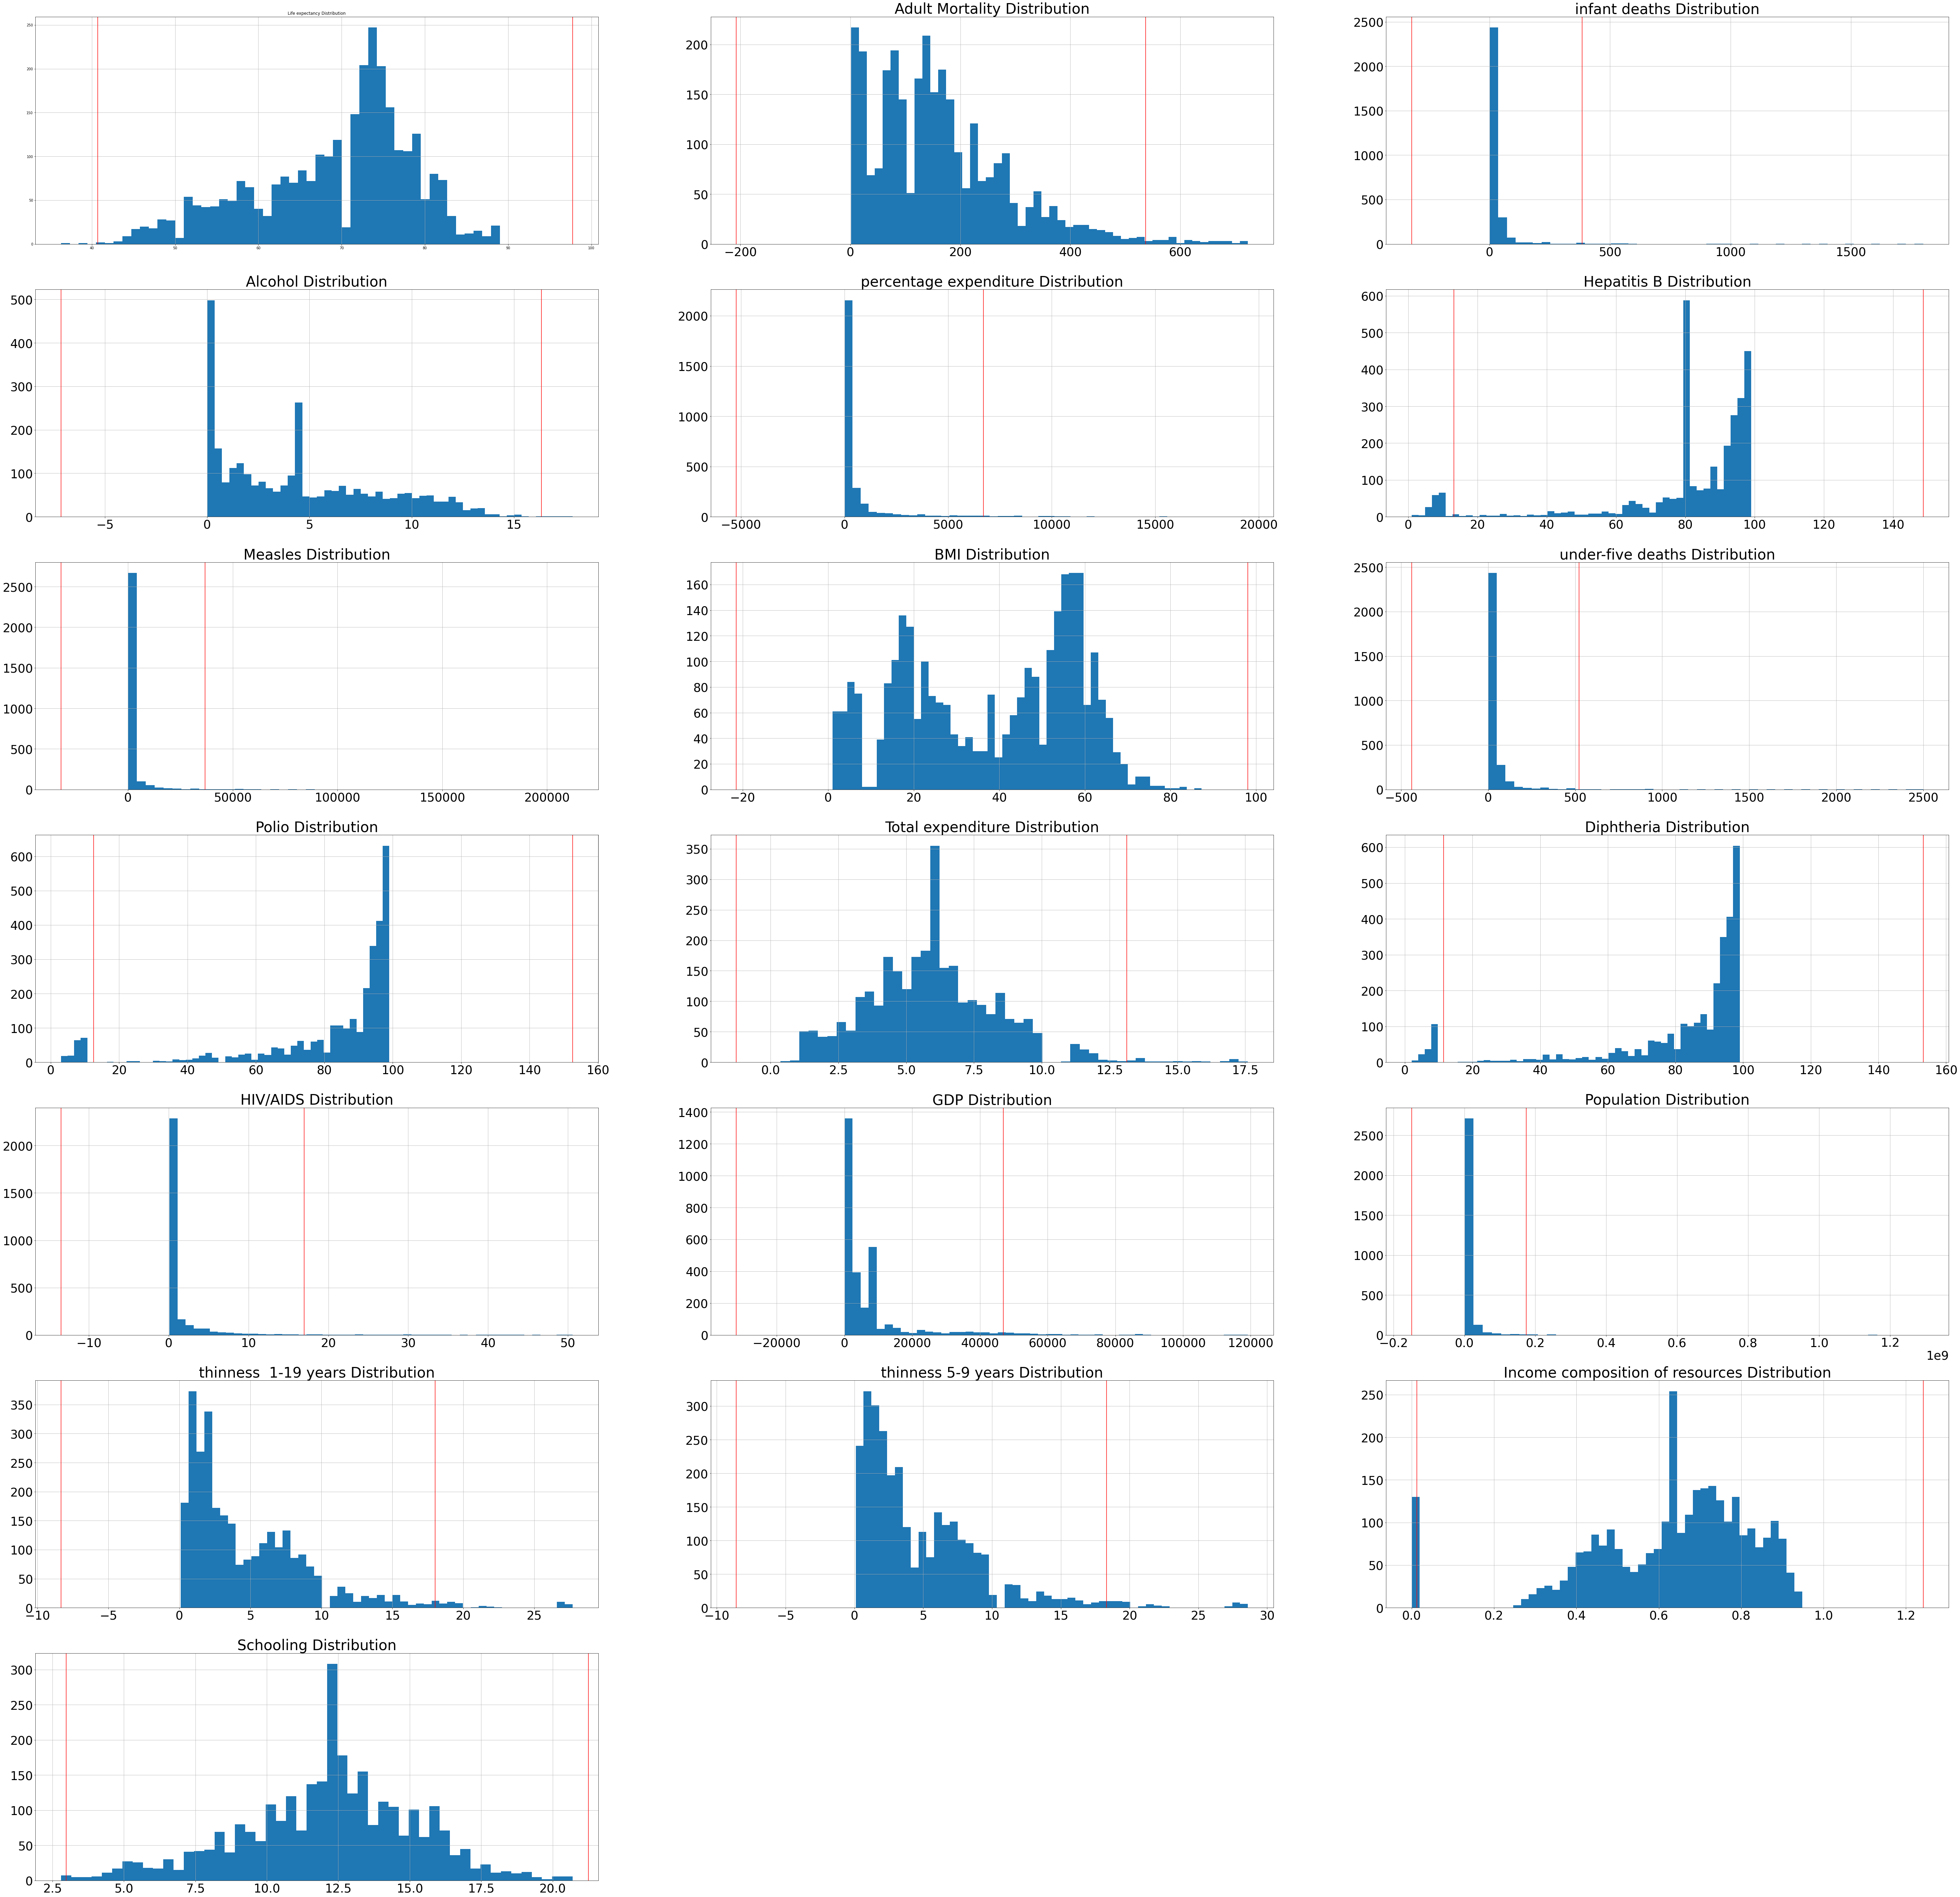

In [16]:
columns = []
for i in list(range(3,22)):
  columns.append(df.iloc[:,i].name)
plt.figure(figsize=(100,100))
for i in columns:
  plt.subplot(7,3,columns.index(i)+1)
  plt.hist(df[i], bins=50)
  m=df[i].mean()
  std=df[i].std()
  plt.axvline(x=m+3*std,color='red')
  plt.axvline(x=m-3*std,color='red')
  plt.title(df[i].name + " Distribution")
  plt.grid()
  plt.rcParams['font.size'] = 35
plt.show()

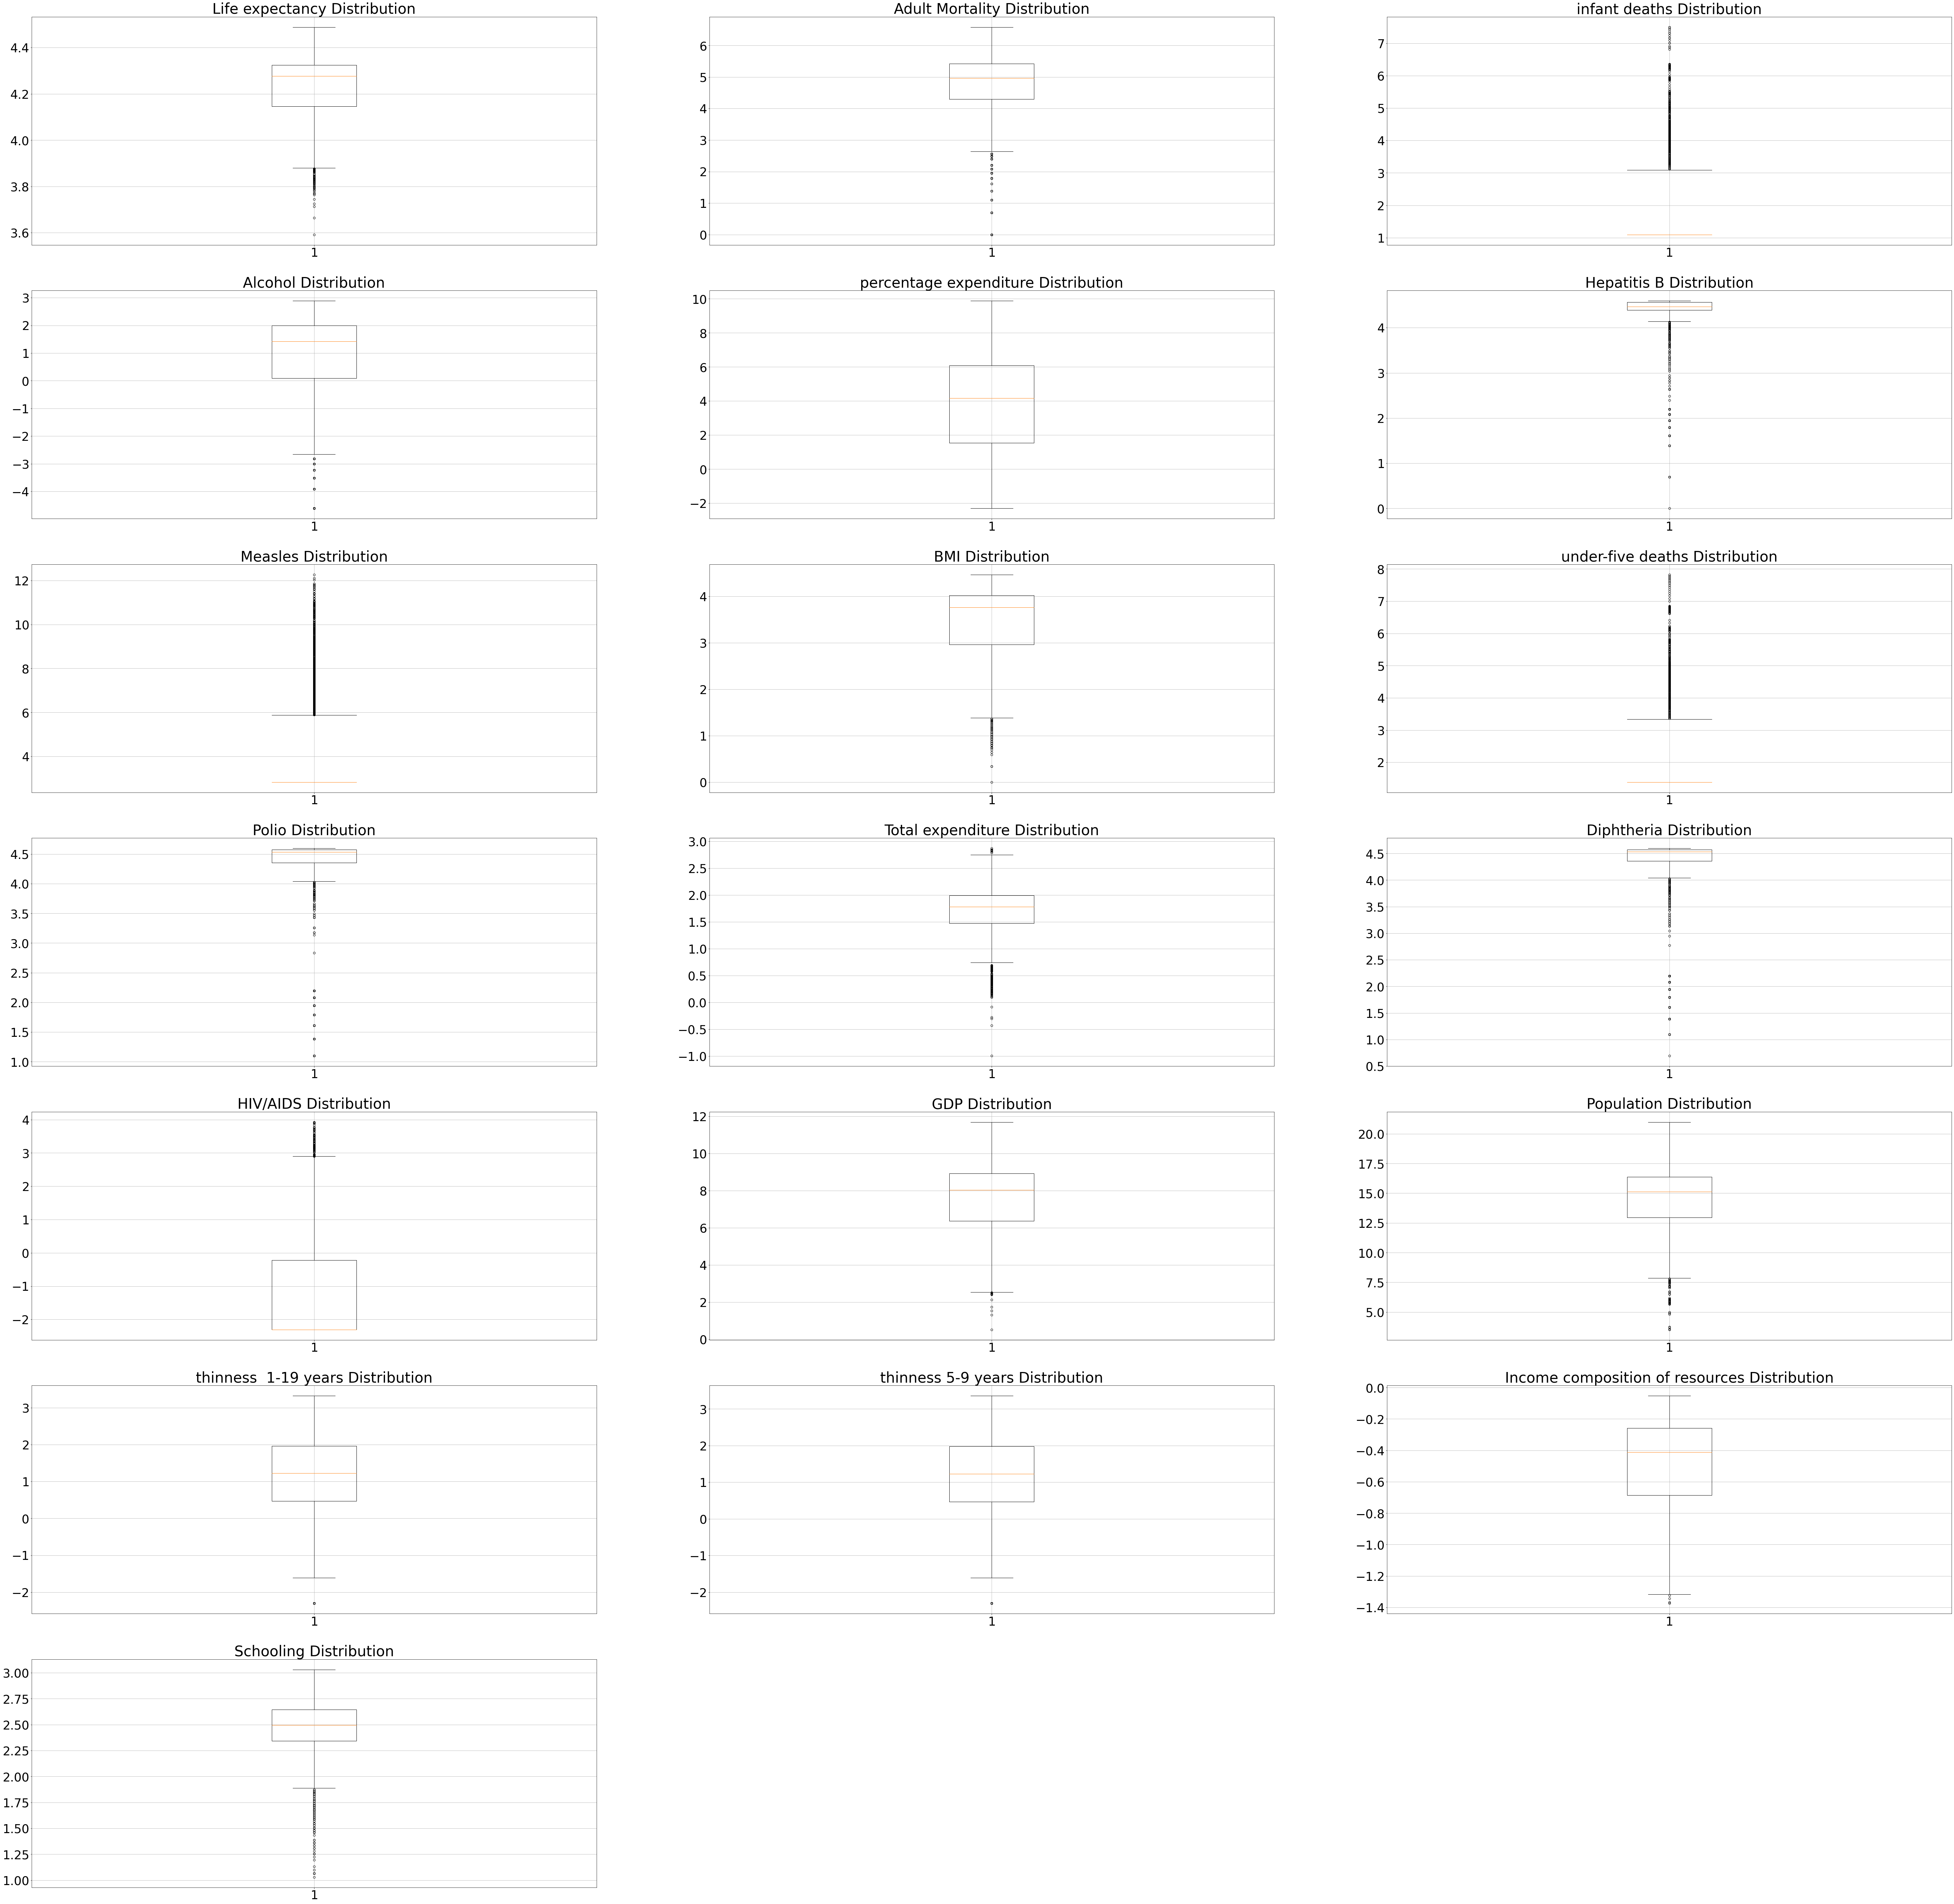

In [17]:
plt.figure(figsize=(100,100))
for i in columns:
  plt.subplot(7,3,columns.index(i)+1)
  plt.boxplot(np.log(df[i]))
  plt.title(df[i].name + " Distribution")
  plt.grid()
plt.show()

We can see the distribution of the columns with the histogram and the boxplot. 

Z-score

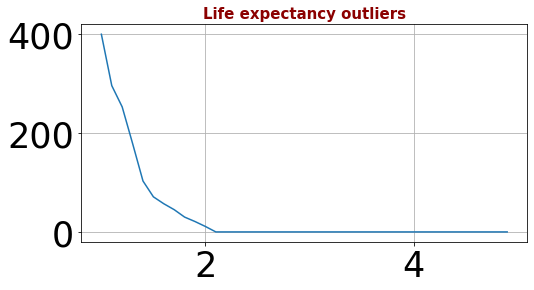

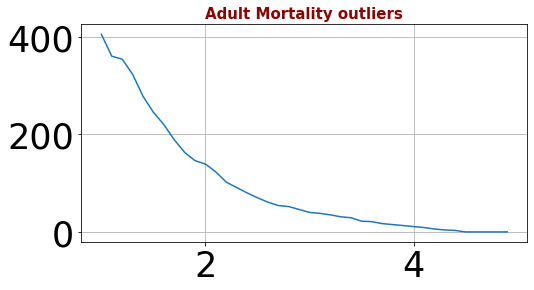

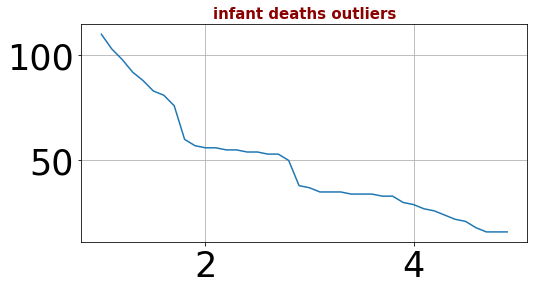

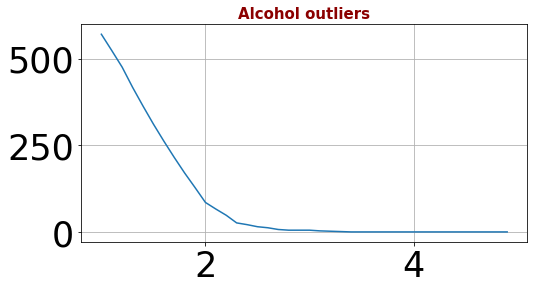

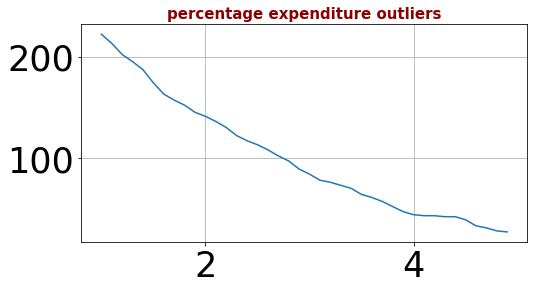

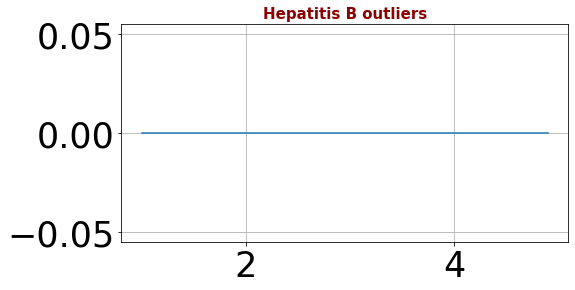

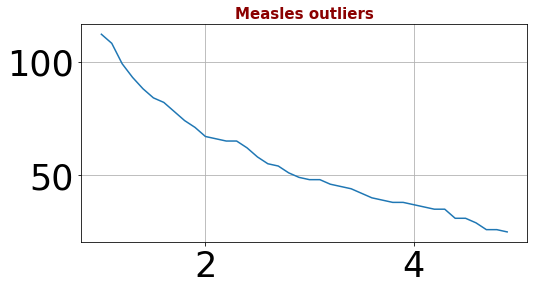

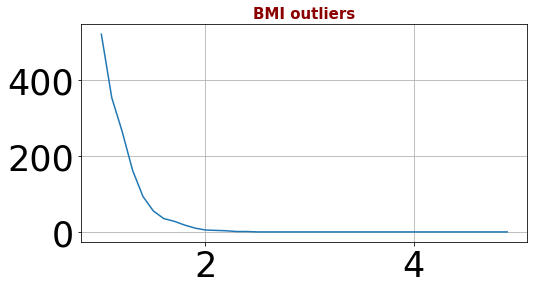

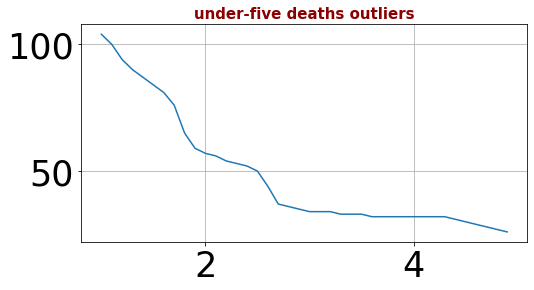

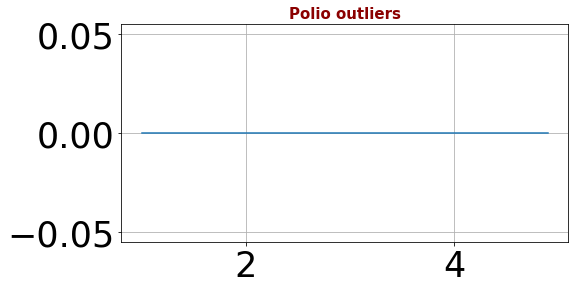

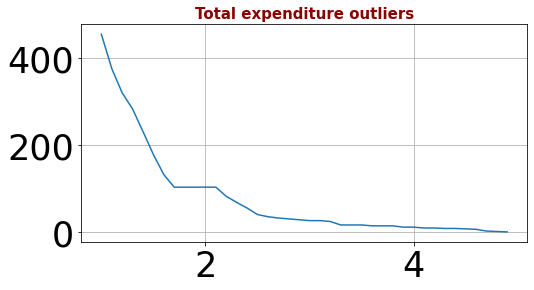

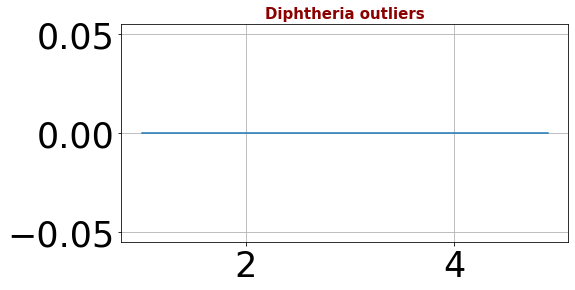

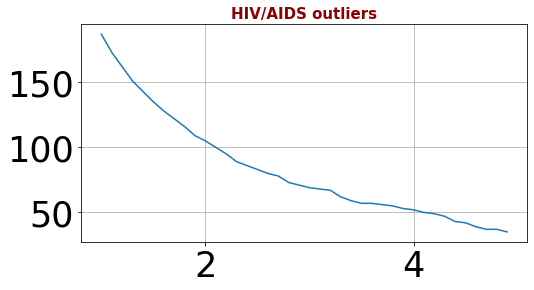

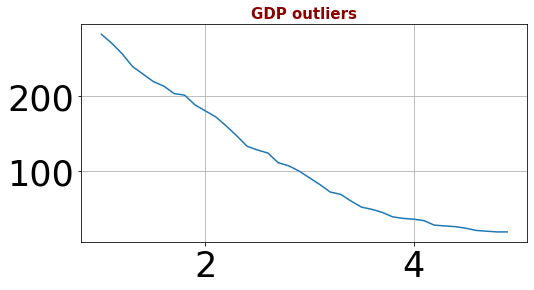

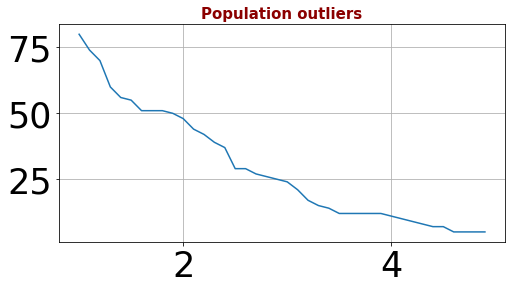

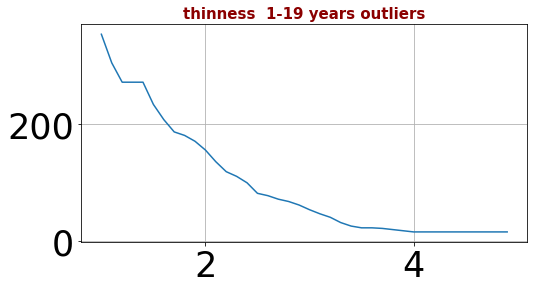

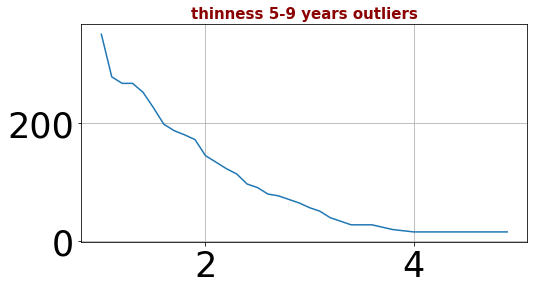

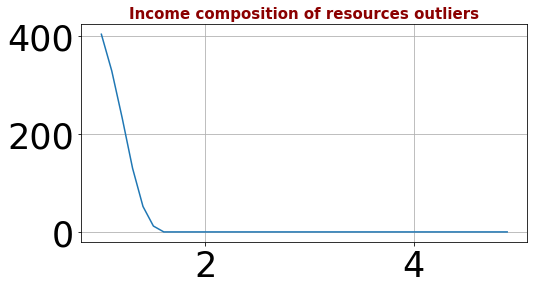

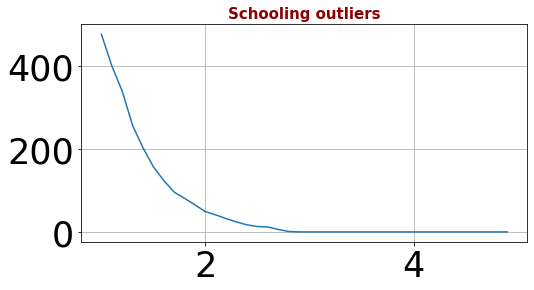

In [18]:
from scipy.stats import zscore

for i in range(0,19):
  zscorelist=[]
  zscores = zscore(df[columns[i]])
  for threshold in np.arange(1,5,0.1):
    zscorelist.append((threshold, len(np.where(zscores>threshold)[0])))
    df_outliers=pd.DataFrame(zscorelist, columns=["threshold","outliers"])
  plt.figure(figsize=(8,4))
  plt.plot(df_outliers.threshold, df_outliers.outliers)
  plt.title("{} outliers".format(columns[i]), fontdict=title_font)
  plt.grid()
  plt.show()

Tukey's Method

In [19]:
for i in columns:

  q75, q25 = np.percentile(df[i], [75,25])
  caa= q75-q25
  q75_log, q25_log = np.percentile(np.log(df[columns]+1), [75,25])
  caa_log = q75_log, q25_log
  comparation = pd.DataFrame()

  for threshold in np.arange(0,5,0.5):

    max_value= q75 + (caa*threshold)
    min_value= q25- (caa*threshold)
    max_value_log= q75+ (caa*threshold)
    min_value_log= q25-(caa*threshold)
    outliers = len((np.where((df[i]>max_value) | (df[i]<min_value))[0]))
    outliers_log = len((np.where((np.log(df[i]+1)>max_value_log) | np.log(df[i]+1<min_value_log))[0]))
    comparation = comparation.append({"threshold": threshold, "outliers {}".format(i): outliers, "outliers_log": outliers_log}, ignore_index=True)
  display(comparation)

,threshold,outliers Life expectancy,outliers_log
0,0.0,1467.0,2273.0
1,0.5,565.0,2582.0
2,1.0,148.0,2818.0
3,1.5,17.0,2930.0
4,2.0,1.0,2937.0
5,2.5,0.0,2938.0
6,3.0,0.0,2938.0
7,3.5,0.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers Adult Mortality,outliers_log
0,0.0,1462.0,2223.0
1,0.5,360.0,2938.0
2,1.0,183.0,2938.0
3,1.5,86.0,2938.0
4,2.0,41.0,2938.0
5,2.5,22.0,2938.0
6,3.0,5.0,2938.0
7,3.5,0.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers infant deaths,outliers_log
0,0.0,725.0,2938.0
1,0.5,517.0,2938.0
2,1.0,419.0,2938.0
3,1.5,315.0,2938.0
4,2.0,226.0,2938.0
5,2.5,187.0,2938.0
6,3.0,158.0,2938.0
7,3.5,138.0,2938.0
8,4.0,130.0,2938.0
9,4.5,121.0,2938.0


,threshold,outliers Alcohol,outliers_log
0,0.0,1469.0,2566.0
1,0.5,305.0,2938.0
2,1.0,25.0,2938.0
3,1.5,3.0,2938.0
4,2.0,0.0,2938.0
5,2.5,0.0,2938.0
6,3.0,0.0,2938.0
7,3.5,0.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers percentage expenditure,outliers_log
0,0.0,1470.0,2236.0
1,0.5,566.0,2938.0
2,1.0,454.0,2938.0
3,1.5,389.0,2938.0
4,2.0,349.0,2938.0
5,2.5,323.0,2938.0
6,3.0,300.0,2938.0
7,3.5,279.0,2938.0
8,4.0,258.0,2938.0
9,4.5,241.0,2938.0


,threshold,outliers Hepatitis B,outliers_log
0,0.0,1271.0,2272.0
1,0.5,514.0,2446.0
2,1.0,405.0,2549.0
3,1.5,316.0,2626.0
4,2.0,274.0,2664.0
5,2.5,238.0,2705.0
6,3.0,206.0,2735.0
7,3.5,194.0,2749.0
8,4.0,175.0,2763.0
9,4.5,161.0,2777.0


,threshold,outliers Measles,outliers_log
0,0.0,735.0,2938.0
1,0.5,649.0,2938.0
2,1.0,593.0,2938.0
3,1.5,542.0,2938.0
4,2.0,513.0,2938.0
5,2.5,480.0,2938.0
6,3.0,451.0,2938.0
7,3.5,423.0,2938.0
8,4.0,409.0,2938.0
9,4.5,396.0,2938.0


,threshold,outliers BMI,outliers_log
0,0.0,1457.0,2287.0
1,0.5,17.0,2938.0
2,1.0,0.0,2938.0
3,1.5,0.0,2938.0
4,2.0,0.0,2938.0
5,2.5,0.0,2938.0
6,3.0,0.0,2938.0
7,3.5,0.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers under-five deaths,outliers_log
0,0.0,729.0,2938.0
1,0.5,567.0,2938.0
2,1.0,465.0,2938.0
3,1.5,394.0,2938.0
4,2.0,308.0,2938.0
5,2.5,232.0,2938.0
6,3.0,195.0,2938.0
7,3.5,163.0,2938.0
8,4.0,145.0,2938.0
9,4.5,133.0,2938.0


,threshold,outliers Polio,outliers_log
0,0.0,1352.0,2245.0
1,0.5,493.0,2456.0
2,1.0,357.0,2595.0
3,1.5,279.0,2670.0
4,2.0,202.0,2738.0
5,2.5,179.0,2759.0
6,3.0,173.0,2765.0
7,3.5,172.0,2766.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers Total expenditure,outliers_log
0,0.0,1466.0,2561.0
1,0.5,602.0,2811.0
2,1.0,160.0,2937.0
3,1.5,51.0,2938.0
4,2.0,26.0,2938.0
5,2.5,14.0,2938.0
6,3.0,8.0,2938.0
7,3.5,0.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers Diphtheria,outliers_log
0,0.0,1303.0,2270.0
1,0.5,489.0,2468.0
2,1.0,347.0,2596.0
3,1.5,298.0,2648.0
4,2.0,230.0,2715.0
5,2.5,191.0,2747.0
6,3.0,172.0,2766.0
7,3.5,170.0,2768.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers HIV/AIDS,outliers_log
0,0.0,711.0,2938.0
1,0.5,652.0,2938.0
2,1.0,584.0,2938.0
3,1.5,542.0,2938.0
4,2.0,474.0,2938.0
5,2.5,435.0,2938.0
6,3.0,403.0,2938.0
7,3.5,373.0,2938.0
8,4.0,347.0,2938.0
9,4.5,325.0,2938.0


,threshold,outliers GDP,outliers_log
0,0.0,1275.0,2204.0
1,0.5,445.0,2938.0
2,1.0,353.0,2938.0
3,1.5,300.0,2938.0
4,2.0,280.0,2938.0
5,2.5,237.0,2938.0
6,3.0,215.0,2938.0
7,3.5,197.0,2938.0
8,4.0,172.0,2938.0
9,4.5,137.0,2938.0


,threshold,outliers Population,outliers_log
0,0.0,1145.0,2203.0
1,0.5,284.0,2938.0
2,1.0,233.0,2938.0
3,1.5,194.0,2938.0
4,2.0,164.0,2938.0
5,2.5,135.0,2938.0
6,3.0,104.0,2938.0
7,3.5,99.0,2938.0
8,4.0,91.0,2938.0
9,4.5,78.0,2938.0


,threshold,outliers thinness 1-19 years,outliers_log
0,0.0,1442.0,2798.0
1,0.5,281.0,2938.0
2,1.0,182.0,2938.0
3,1.5,100.0,2938.0
4,2.0,53.0,2938.0
5,2.5,23.0,2938.0
6,3.0,16.0,2938.0
7,3.5,16.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers thinness 5-9 years,outliers_log
0,0.0,1450.0,2751.0
1,0.5,267.0,2938.0
2,1.0,182.0,2938.0
3,1.5,99.0,2938.0
4,2.0,55.0,2938.0
5,2.5,26.0,2938.0
6,3.0,16.0,2938.0
7,3.5,16.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers Income composition of resources,outliers_log
0,0.0,1469.0,2938.0
1,0.5,325.0,2938.0
2,1.0,130.0,2938.0
3,1.5,130.0,2938.0
4,2.0,0.0,2938.0
5,2.5,0.0,2938.0
6,3.0,0.0,2938.0
7,3.5,0.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


,threshold,outliers Schooling,outliers_log
0,0.0,1462.0,2422.0
1,0.5,655.0,2706.0
2,1.0,234.0,2830.0
3,1.5,56.0,2921.0
4,2.0,6.0,2938.0
5,2.5,0.0,2938.0
6,3.0,0.0,2938.0
7,3.5,0.0,2938.0
8,4.0,0.0,2938.0
9,4.5,0.0,2938.0


In [20]:
df_2 = df.copy()

In [21]:
columns.remove("BMI")

In [22]:
columns

['Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [23]:
x = "log "
log_columns = list(map(lambda a: x + a, columns))
log_columns

['log Life expectancy',
 'log Adult Mortality',
 'log infant deaths',
 'log Alcohol',
 'log percentage expenditure',
 'log Hepatitis B',
 'log Measles',
 'log under-five deaths',
 'log Polio',
 'log Total expenditure',
 'log Diphtheria',
 'log HIV/AIDS',
 'log GDP',
 'log Population',
 'log thinness  1-19 years',
 'log thinness 5-9 years',
 'log Income composition of resources',
 'log Schooling']

In [24]:
for i, j in zip(log_columns, columns):
  df_2[i] = np.log(df[j]+1)

In [25]:
df_2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,log Polio,log Total expenditure,log Diphtheria,log HIV/AIDS,log GDP,log Population,log thinness 1-19 years,log thinness 5-9 years,log Income composition of resources,log Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,1.945910,2.214846,4.189655,0.095310,6.372055,17.334091,2.901422,2.906901,0.391366,2.406945
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,4.077537,2.217027,4.143135,0.095310,6.419501,12.699497,2.917771,2.917771,0.389336,2.397895
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,4.143135,2.211566,4.174387,0.095310,6.450067,17.272826,2.928524,2.928524,0.385262,2.388763
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,4.219508,2.253395,4.219508,0.095310,6.508708,15.123021,2.939162,2.944439,0.380489,2.379546
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,4.234107,2.182675,4.234107,0.095310,4.167242,14.906964,2.954910,2.954910,0.374318,2.351375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,4.219508,2.095561,4.189655,3.543854,6.121103,16.363197,2.341806,2.341806,0.341460,2.322388
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,2.079442,2.017566,4.234107,3.629660,6.118870,16.351894,2.379546,2.388763,0.349247,2.351375
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,4.304065,2.018895,4.276666,3.708682,4.066431,11.740268,0.788457,0.832909,0.355574,2.397895
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,4.343805,1.968510,4.330733,3.763523,6.309168,16.330475,0.955511,0.993252,0.355574,2.379546


Log Transformation

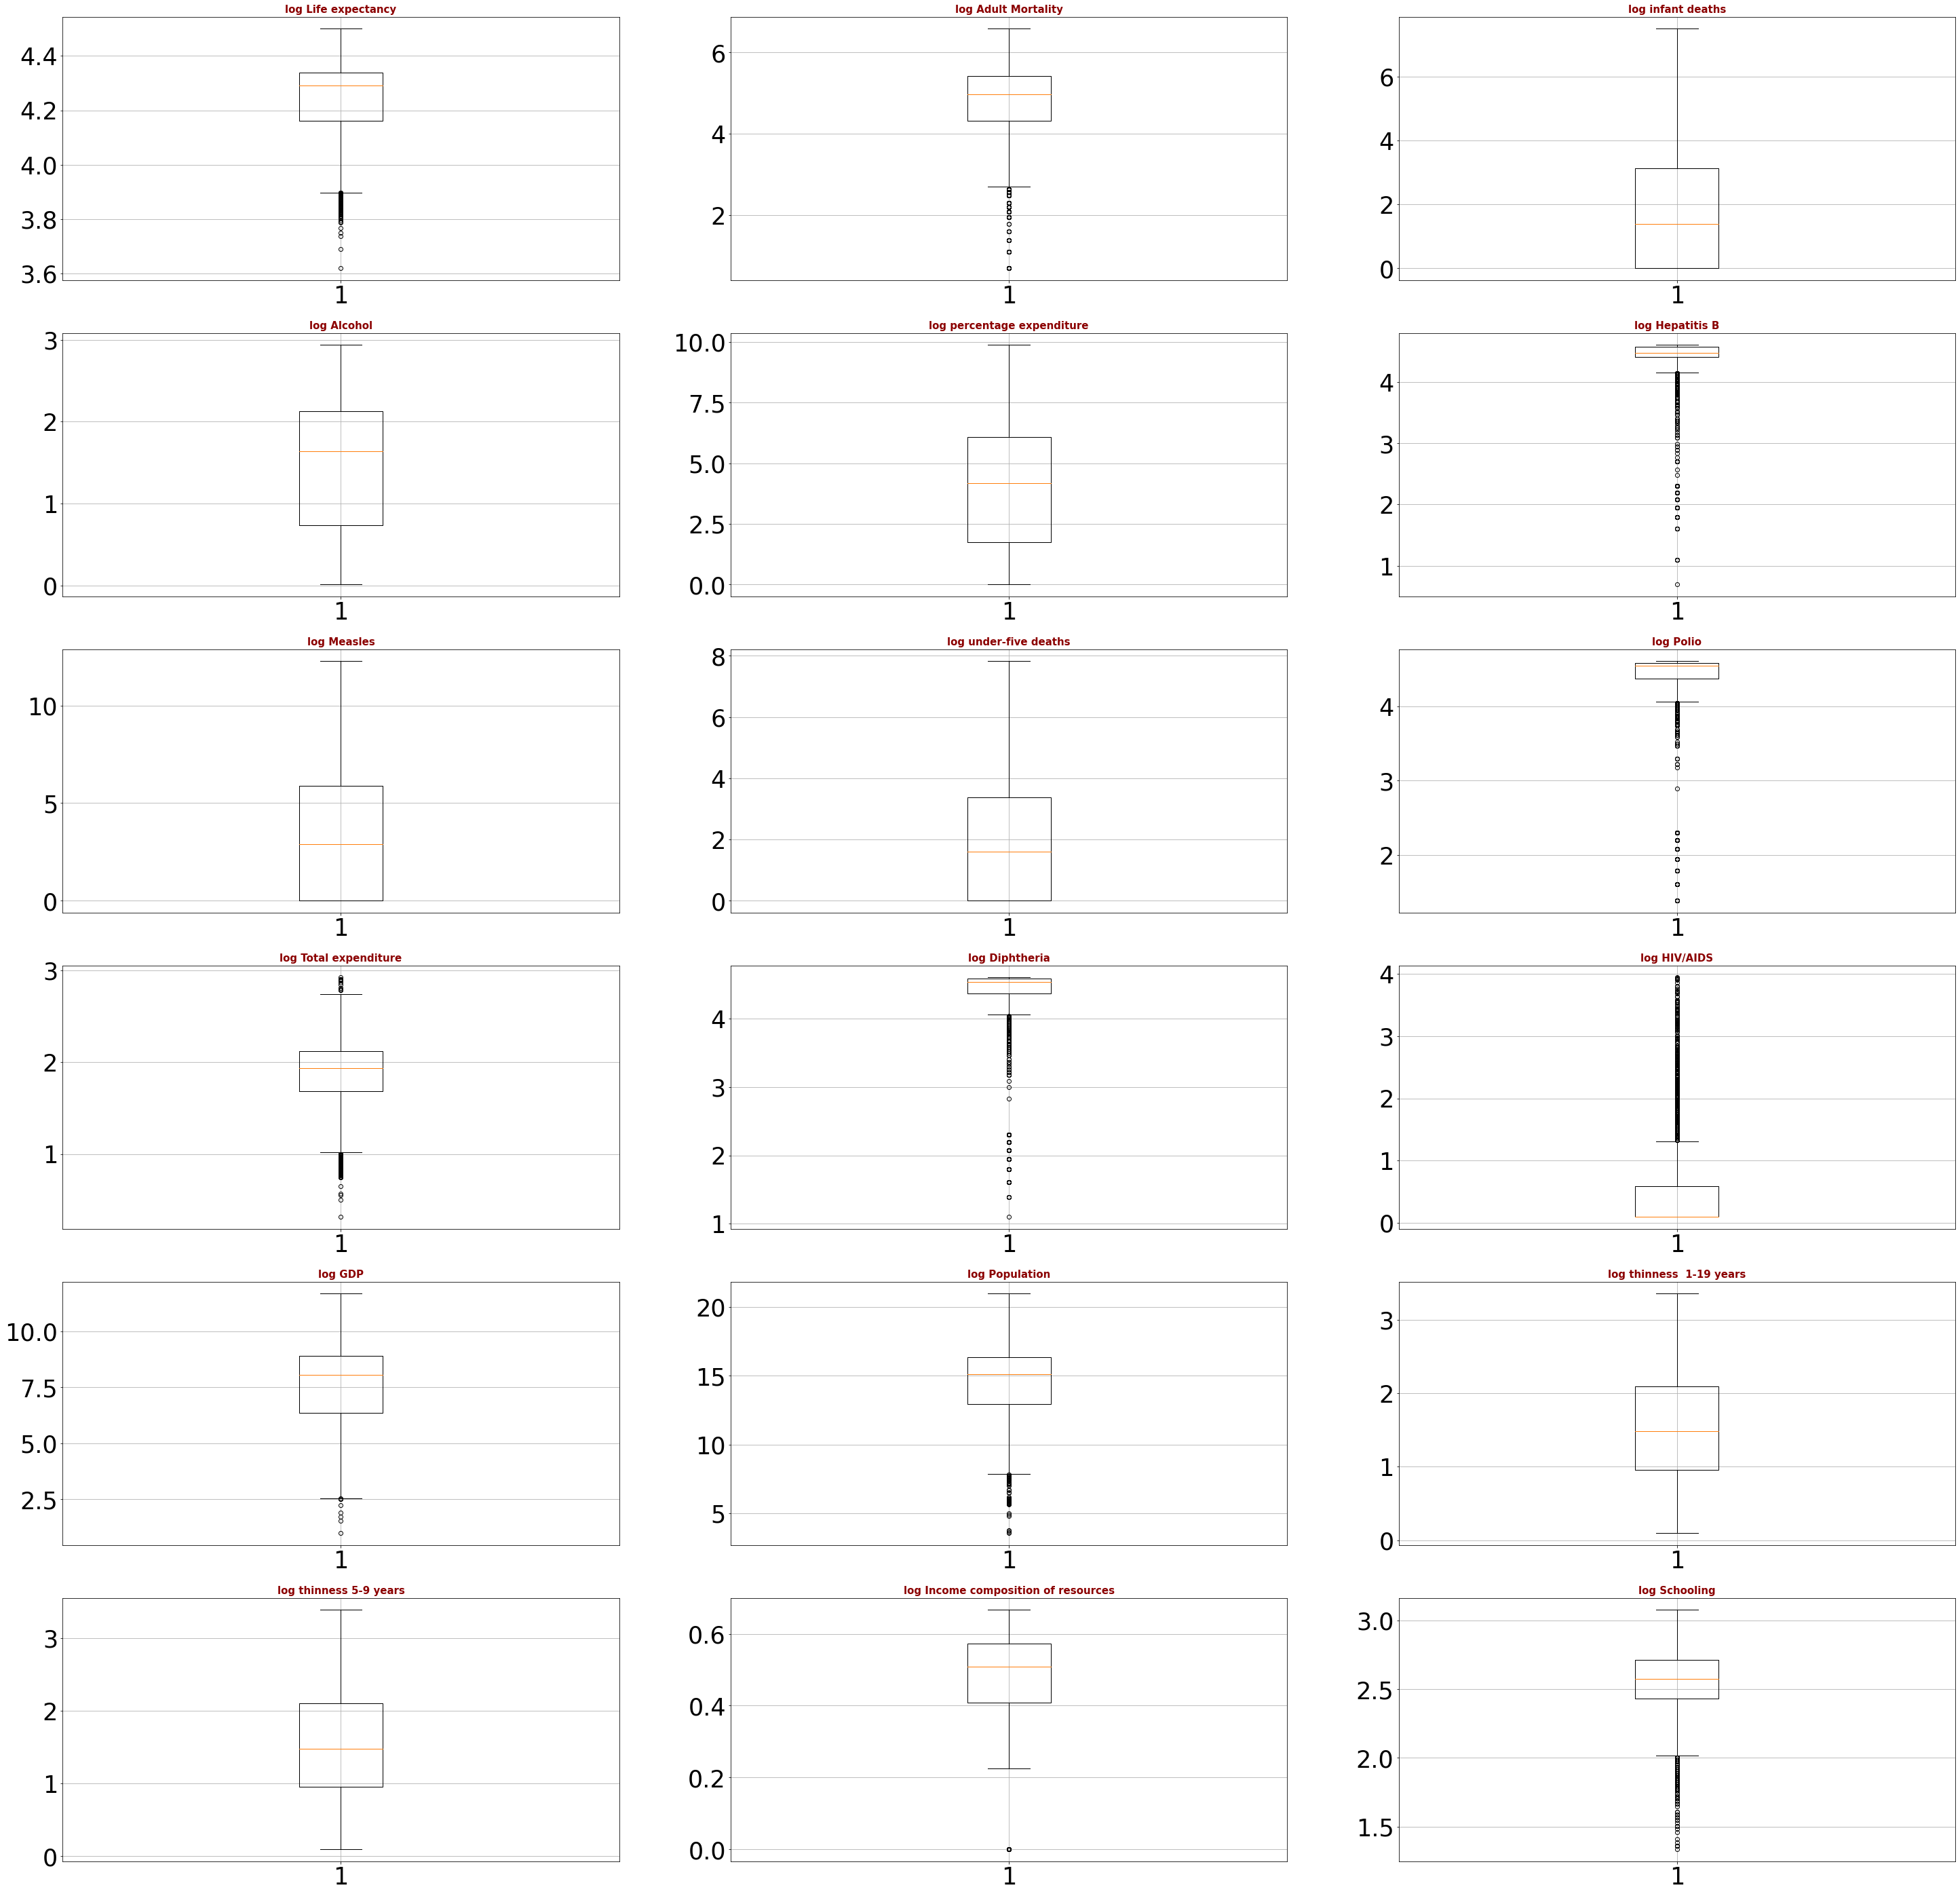

In [26]:
plt.figure(figsize=(50,50))
for i in range(0, len(log_columns)):
  plt.subplot(6,3,i+1)
  plt.boxplot(df_2[log_columns[i]])
  plt.title(log_columns[i], fontdict=title_font)
  plt.grid()
  plt.rcParams['font.size'] = 35
plt.show()

In [27]:
columns

['Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [28]:
remove_colm = "infant deaths", "Alcohol","percentage expenditure","Measles","under-five deaths","GDP", "thinness  1-19 years","thinness 5-9 years"
for i in remove_colm:
  columns.remove(i)
columns

['Life expectancy',
 'Adult Mortality',
 'Hepatitis B',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'Population',
 'Income composition of resources',
 'Schooling']

Winsorization

In [29]:
from scipy.stats.mstats import winsorize

df_2["winsorize life expectancy"] = winsorize(df_2["log Life expectancy"], (0.03,0))
df_2["winsorize Adult Mortality"] = winsorize(df_2["log Adult Mortality"], (0.06,0))
df_2["winsorize Hepatitis B"] = winsorize(df_2["log Hepatitis B"], (0.119,0))
df_2["winsorize Polio"] = winsorize(df_2["log Polio"], (0.114,0))
df_2["winsorize Total expenditure"] = winsorize(df_2["log Total expenditure"], (0.037,0.0048))
df_2["winsorize Diphtheria"] = winsorize(df_2["log Diphtheria"], (0.114,0))
df_2["winsorize HIV/AIDS"] = winsorize(df_2["log HIV/AIDS"], (0,0.144))
df_2["winsorize Population"] = winsorize(df_2["log Population"], (0.017,0))
df_2["winsorize Income composition of resources"] = winsorize(df_2["log Income composition of resources"], (0.05,0))
df_2["winsorize Schooling"] = winsorize(df_2["log Schooling"], (0.051,0))

In [30]:
df_3 = df_2.drop(df_2.columns[[range(0,22)]],axis = 1)
df_3

,log Life expectancy,log Adult Mortality,log infant deaths,log Alcohol,log percentage expenditure,log Hepatitis B,log Measles,log under-five deaths,log Polio,log Total expenditure,...,winsorize life expectancy,winsorize Adult Mortality,winsorize Hepatitis B,winsorize Polio,winsorize Total expenditure,winsorize Diphtheria,winsorize HIV/AIDS,winsorize Population,winsorize Income composition of resources,winsorize Schooling
0,4.189655,5.575949,4.143135,0.009950,4.280542,4.189655,7.051856,4.430817,1.945910,2.214846,...,4.189655,5.575949,4.189655,4.060443,2.214846,4.189655,0.095310,17.334091,0.391366,2.406945
1,4.109233,5.605802,4.174387,0.009950,4.311116,4.143135,6.200509,4.465908,4.077537,2.217027,...,4.109233,5.605802,4.158883,4.077537,2.217027,4.143135,0.095310,12.699497,0.389336,2.397895
2,4.109233,5.594711,4.204693,0.009950,4.307023,4.174387,6.066108,4.499810,4.143135,2.211566,...,4.109233,5.594711,4.174387,4.143135,2.211566,4.174387,0.095310,17.272826,0.385262,2.388763
3,4.102643,5.609472,4.248495,0.009950,4.371777,4.219508,7.933080,4.543295,4.219508,2.253395,...,4.102643,5.609472,4.219508,4.219508,2.253395,4.219508,0.095310,15.123021,0.380489,2.379546
4,4.097672,5.620401,4.276666,0.009950,2.091507,4.234107,8.011023,4.584967,4.234107,2.182675,...,4.097672,5.620401,4.234107,4.234107,2.182675,4.234107,0.095310,14.906964,0.374318,2.351375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,3.813307,6.584791,3.332205,1.678964,0.000000,4.234107,3.465736,3.761200,4.219508,2.095561,...,3.901973,6.584791,4.234107,4.219508,2.095561,4.189655,1.308333,16.363197,0.341460,2.322388
2934,3.817712,6.573680,3.295837,1.621366,0.000000,2.079442,6.906755,3.737670,2.079442,2.017566,...,3.901973,6.573680,4.158883,4.060443,2.017566,4.234107,1.308333,16.351894,0.349247,2.351375
2935,3.824284,4.304065,3.258097,1.691939,0.000000,4.304065,5.720312,3.713572,4.304065,2.018895,...,3.901973,4.304065,4.304065,4.304065,2.018895,4.276666,1.308333,11.740268,0.355574,2.397895
2936,3.835142,6.532334,3.258097,1.000632,0.000000,4.343805,6.272877,3.688879,4.343805,1.968510,...,3.901973,6.532334,4.343805,4.343805,1.968510,4.330733,1.308333,16.330475,0.355574,2.379546


In [31]:
del_colm = "log Life expectancy","log Adult Mortality","log Hepatitis B","log Polio","log Total expenditure","log Diphtheria","log HIV/AIDS","log Population","log Schooling","log GDP","log Income composition of resources"

for i in del_colm:
  df_2.drop(i, axis=1, inplace=True)
df_2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,winsorize life expectancy,winsorize Adult Mortality,winsorize Hepatitis B,winsorize Polio,winsorize Total expenditure,winsorize Diphtheria,winsorize HIV/AIDS,winsorize Population,winsorize Income composition of resources,winsorize Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,4.189655,5.575949,4.189655,4.060443,2.214846,4.189655,0.095310,17.334091,0.391366,2.406945
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,4.109233,5.605802,4.158883,4.077537,2.217027,4.143135,0.095310,12.699497,0.389336,2.397895
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,4.109233,5.594711,4.174387,4.143135,2.211566,4.174387,0.095310,17.272826,0.385262,2.388763
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,4.102643,5.609472,4.219508,4.219508,2.253395,4.219508,0.095310,15.123021,0.380489,2.379546
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,4.097672,5.620401,4.234107,4.234107,2.182675,4.234107,0.095310,14.906964,0.374318,2.351375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,3.901973,6.584791,4.234107,4.219508,2.095561,4.189655,1.308333,16.363197,0.341460,2.322388
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,3.901973,6.573680,4.158883,4.060443,2.017566,4.234107,1.308333,16.351894,0.349247,2.351375
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,3.901973,4.304065,4.304065,4.304065,2.018895,4.276666,1.308333,11.740268,0.355574,2.397895
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,3.901973,6.532334,4.343805,4.343805,1.968510,4.330733,1.308333,16.330475,0.355574,2.379546


In [32]:
del_colm = "log Life expectancy","log Adult Mortality","log Hepatitis B","log Polio","log Total expenditure","log Diphtheria","log HIV/AIDS","log Population","log Schooling","log GDP","log Income composition of resources"

for i in del_colm:
  df_3.drop(i, axis=1, inplace=True)

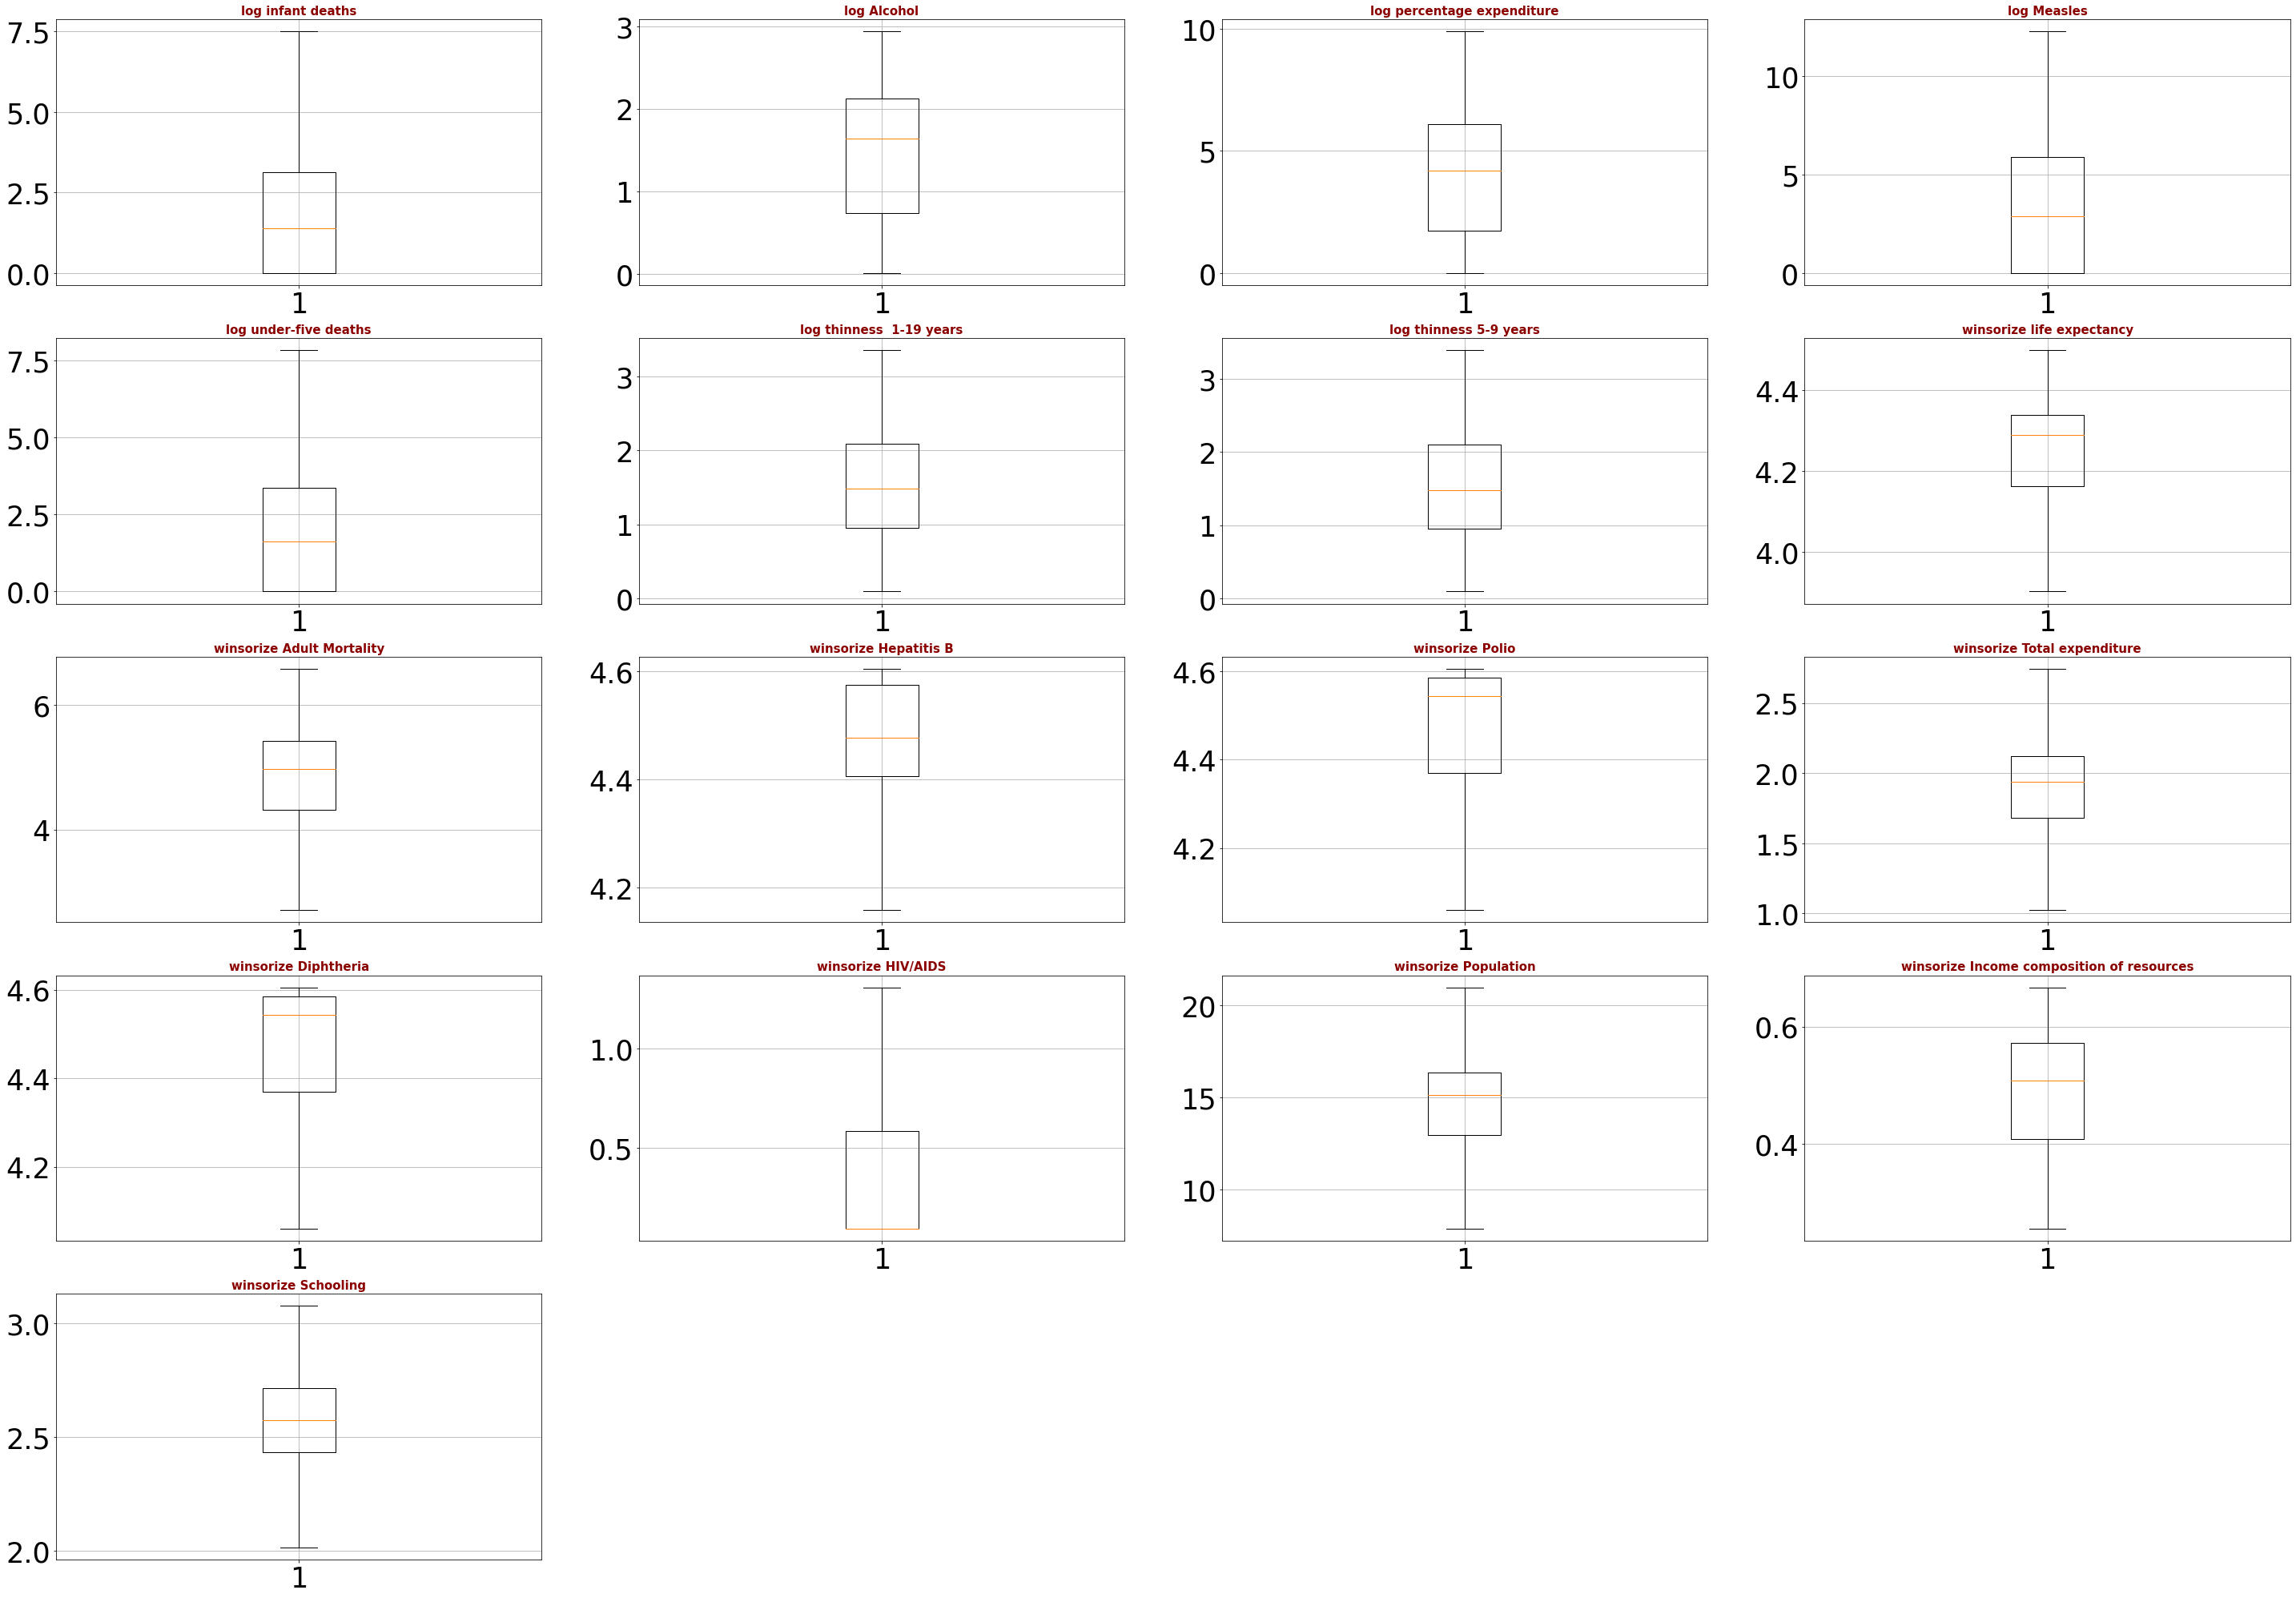

In [33]:
plt.figure(figsize=(50,50))
for i in range(0, len(df_3.columns)):
  plt.subplot(7,4,i+1)
  plt.boxplot(df_3[df_3.columns[i]])
  plt.title(df_3.columns[i], fontdict=title_font)
  plt.grid()
  plt.rcParams['font.size'] = 35
plt.show()

In [34]:
df_2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling'],
      dtype='object')

Exploratory Data Analysis

Life Expectancy by Status

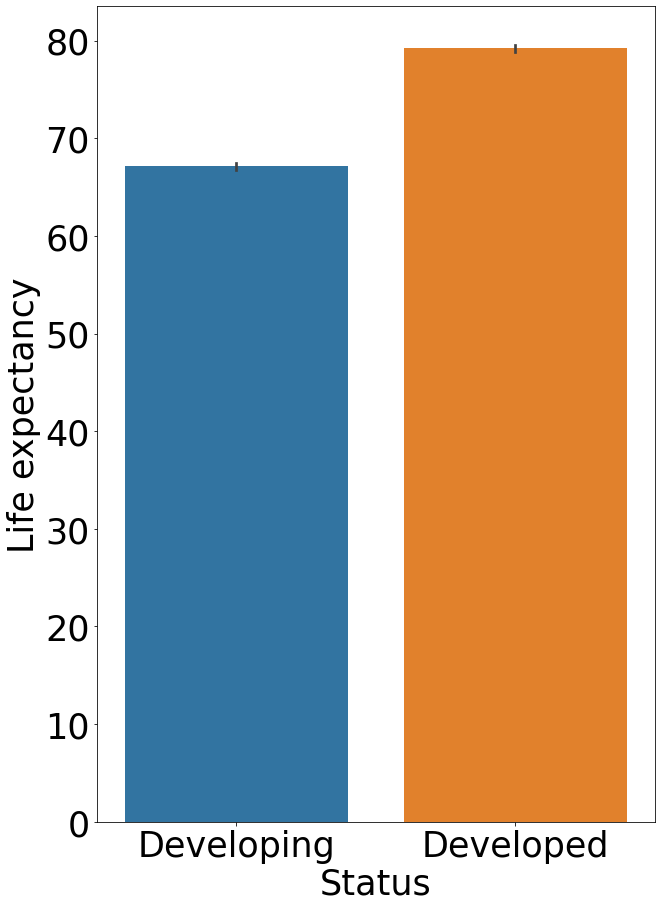

In [35]:
import seaborn as sns
plt.figure(figsize=(10,15))
sns.barplot(df_2["Status"], df_2["Life expectancy"]);

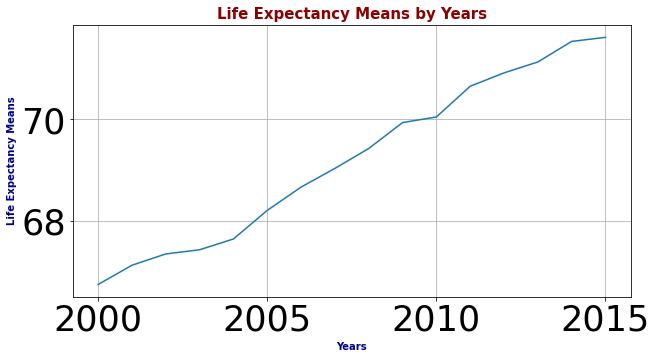

In [36]:
Life_ex = df_2.groupby("Year").mean()
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(Life_ex.index, Life_ex["Life expectancy"])
plt.title("Life Expectancy Means by Years", fontdict=title_font)
plt.xlabel("Years", fontdict=label_font)
plt.ylabel("Life Expectancy Means", fontdict=label_font)
plt.show()

T-test

In [37]:
from scipy.stats import stats
statu = df_2.Status.unique()
comparasion = pd.DataFrame(columns=["group_1","group_2","statistics","p_value"])
pd.options.display.float_format = "{:.6f}".format

for i in range(0, len(statu)):
  for j in range(i+1, len(statu)):
    t_test = stats.ttest_ind(df_2[df_2["Status"]== statu[i]]["winsorize life expectancy"],
                             df_2[df_2["Status"]== statu[j]]["winsorize life expectancy"])
    group_1= statu[i]
    group_2 = statu[j]
    statistics = t_test[0]
    p_value= t_test[1]
    comparasion = comparasion.append({"group_1": group_1, "group_2": group_2, "statistics": statistics,
                                      "p_value": p_value}, ignore_index=True)
    display(comparasion)

,group_1,group_2,statistics,p_value
0,Developing,Developed,-27.956731,0.000000


In [38]:
df_2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling'],
      dtype='object')

In [39]:
df_4 = df_2.copy()
column_names = ["winsorize life expectancy","log percentage expenditure","log Alcohol","winsorize Schooling","winsorize Hepatitis B","BMI","Country","Year"]
for i in df_4.columns:
  if i not in column_names:
    df_4.drop([i], inplace=True, axis=1)
df_4.head()

,Country,Year,BMI,log Alcohol,log percentage expenditure,winsorize life expectancy,winsorize Hepatitis B,winsorize Schooling
0,Afghanistan,2015,19.100000,0.009950,4.280542,4.189655,4.189655,2.406945
1,Afghanistan,2014,18.600000,0.009950,4.311116,4.109233,4.158883,2.397895
2,Afghanistan,2013,18.100000,0.009950,4.307023,4.109233,4.174387,2.388763
3,Afghanistan,2012,17.600000,0.009950,4.371777,4.102643,4.219508,2.379546
4,Afghanistan,2011,17.200000,0.009950,2.091507,4.097672,4.234107,2.351375


In [40]:
df_4_matrix = df_4.corr()
display(df_4_matrix)

,Year,BMI,log Alcohol,log percentage expenditure,winsorize life expectancy,winsorize Hepatitis B,winsorize Schooling
Year,1.000000,0.108327,-0.058925,-0.068811,0.168052,0.138744,0.185103
BMI,0.108327,1.000000,0.287154,0.252610,0.560179,0.192800,0.551819
log Alcohol,-0.058925,0.287154,1.000000,0.213601,0.330854,0.116201,0.483686
log percentage expenditure,-0.068811,0.252610,0.213601,1.000000,0.362773,0.083594,0.385076
winsorize life expectancy,0.168052,0.560179,0.330854,0.362773,1.000000,0.305531,0.735439
winsorize Hepatitis B,0.138744,0.192800,0.116201,0.083594,0.305531,1.000000,0.296331
winsorize Schooling,0.185103,0.551819,0.483686,0.385076,0.735439,0.296331,1.000000


Correlation Matrix

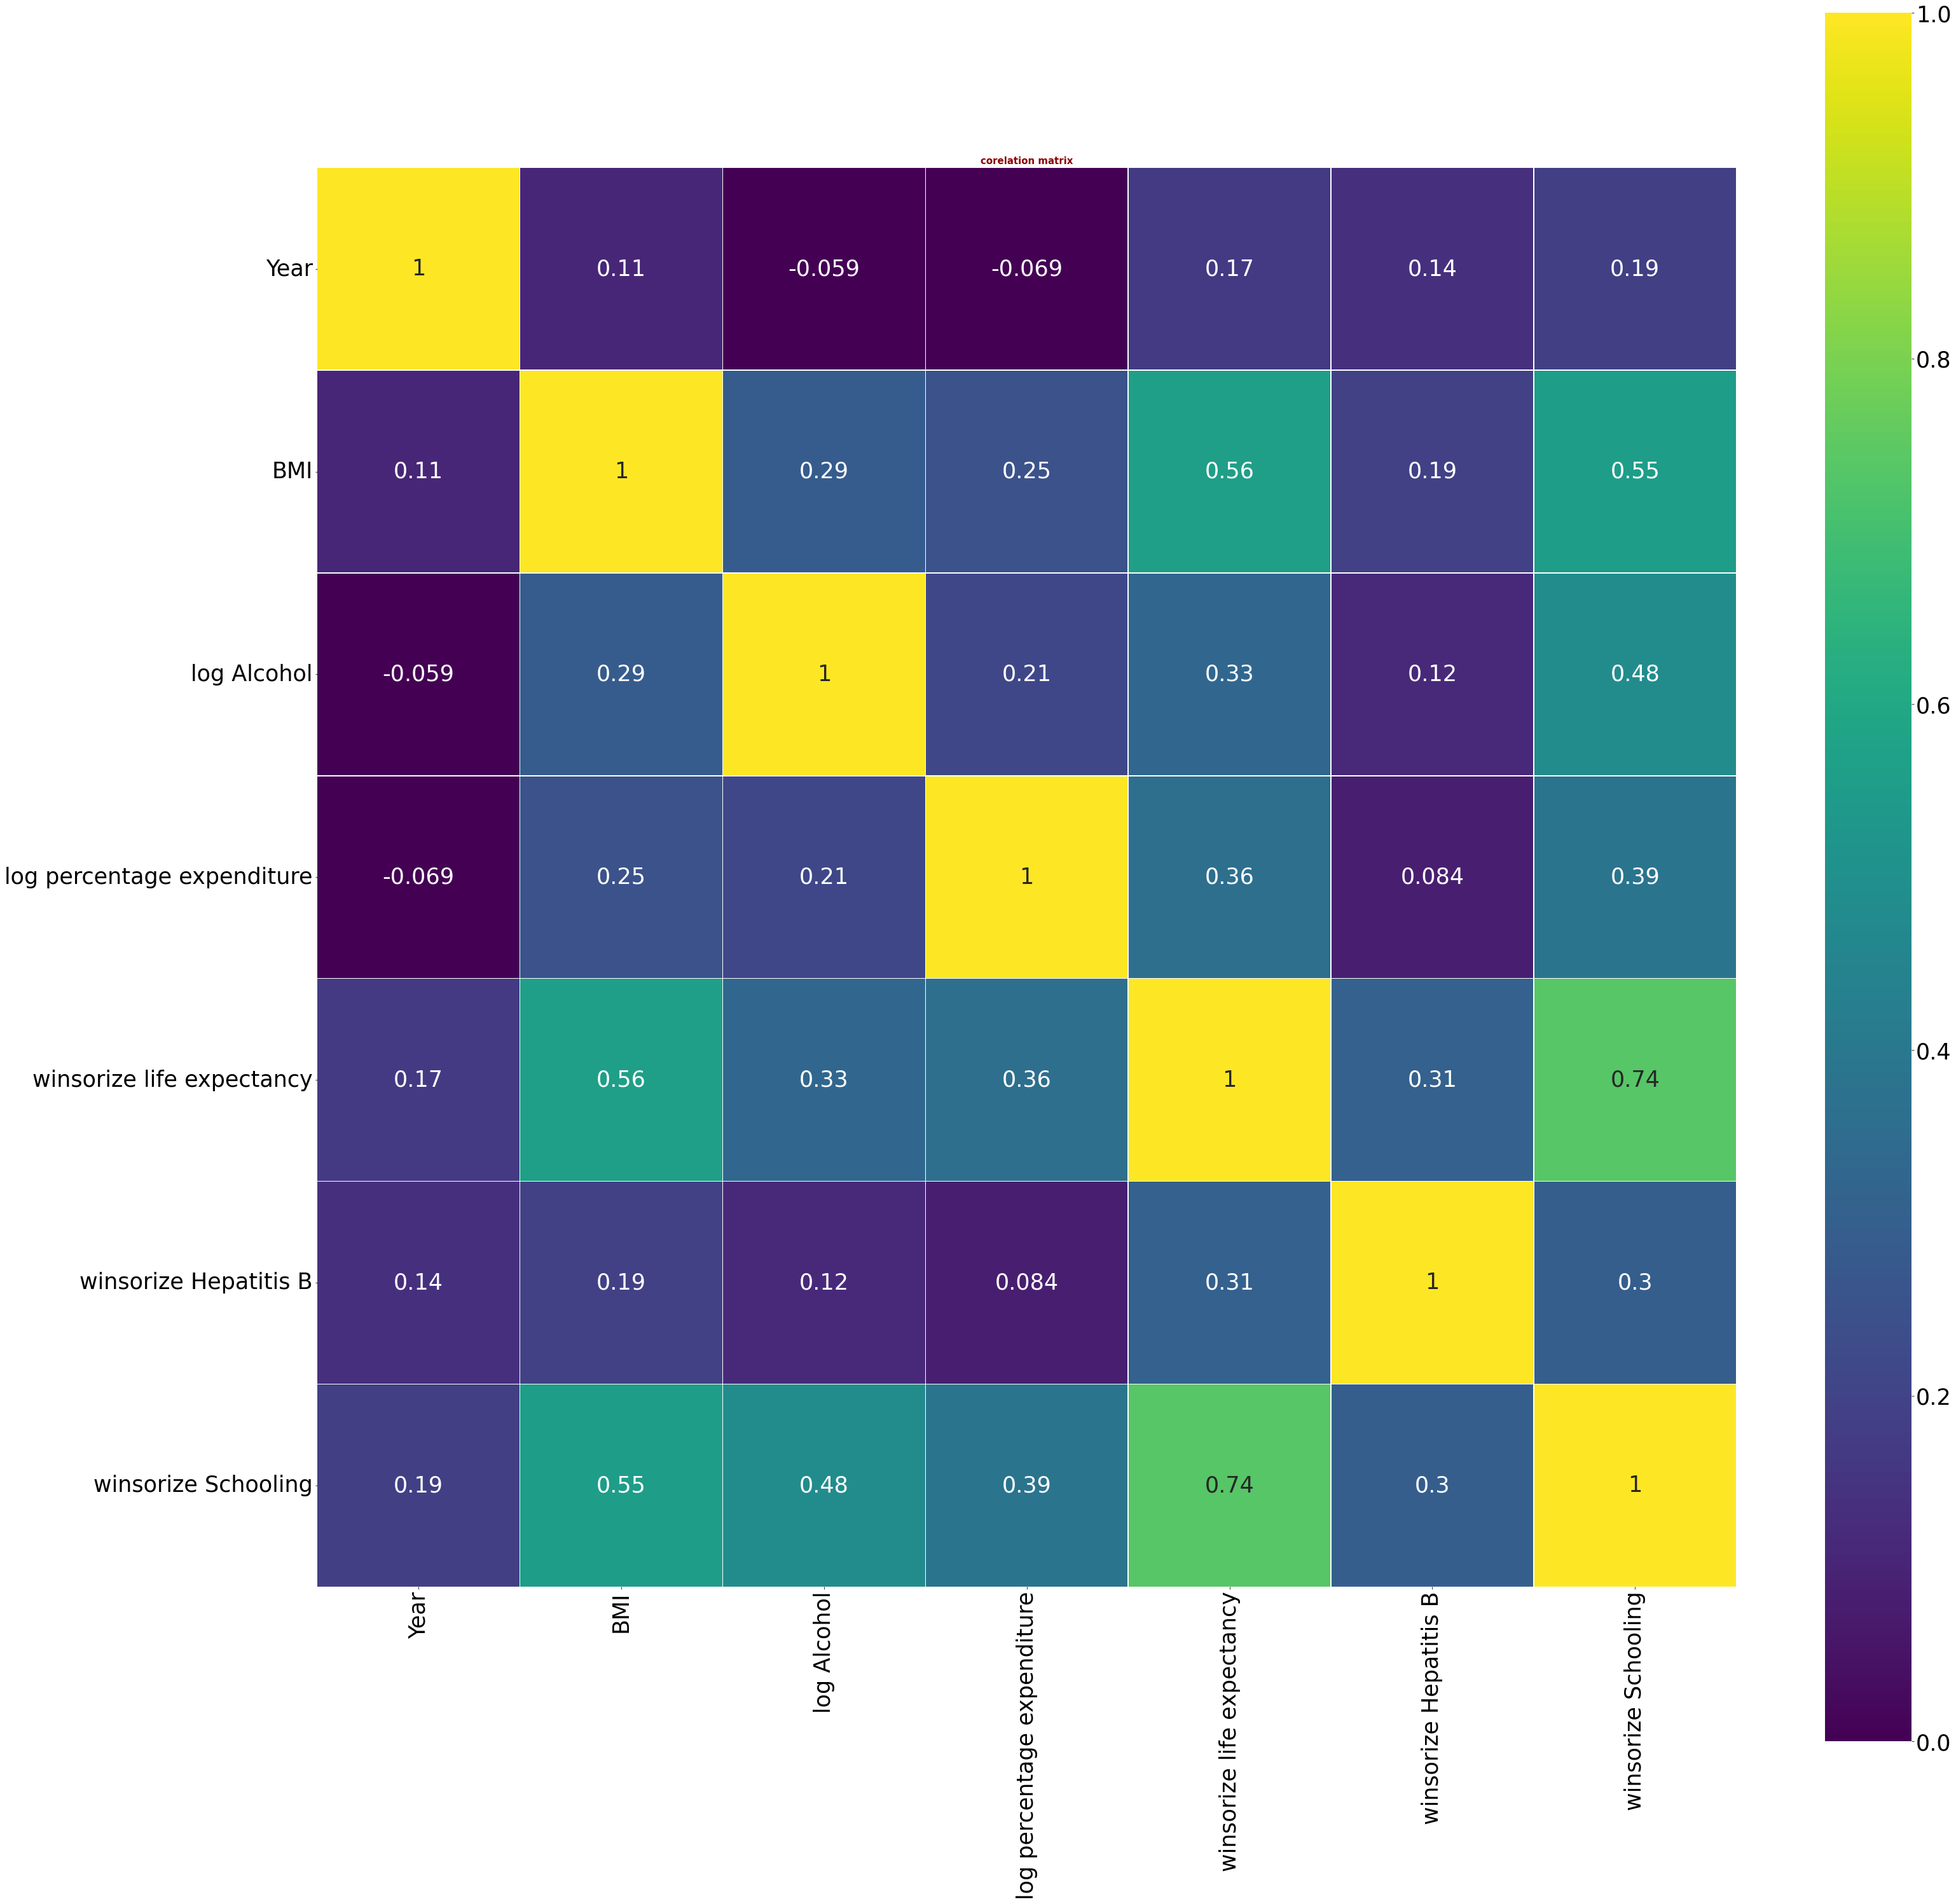

In [41]:
plt.figure(figsize=(50,50))
sns.heatmap(df_4_matrix, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap="viridis")
plt.title("corelation matrix", fontdict=title_font)
plt.show()

get dummies

In [42]:
drop_col = ["Country","Status","Year"]
df_5 = pd.concat([df_2, pd.get_dummies(df_2["Status"])], axis=1)
df_5.drop(drop_col, inplace=True, axis=1)
df_5.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,winsorize Hepatitis B,winsorize Polio,winsorize Total expenditure,winsorize Diphtheria,winsorize HIV/AIDS,winsorize Population,winsorize Income composition of resources,winsorize Schooling,Developed,Developing
0,65.000000,263.000000,62,0.010000,71.279624,65.000000,1154,19.100000,83,6.000000,...,4.189655,4.060443,2.214846,4.189655,0.095310,17.334091,0.391366,2.406945,0,1
1,59.900000,271.000000,64,0.010000,73.523582,62.000000,492,18.600000,86,58.000000,...,4.158883,4.077537,2.217027,4.143135,0.095310,12.699497,0.389336,2.397895,0,1
2,59.900000,268.000000,66,0.010000,73.219243,64.000000,430,18.100000,89,62.000000,...,4.174387,4.143135,2.211566,4.174387,0.095310,17.272826,0.385262,2.388763,0,1
3,59.500000,272.000000,69,0.010000,78.184215,67.000000,2787,17.600000,93,67.000000,...,4.219508,4.219508,2.253395,4.219508,0.095310,15.123021,0.380489,2.379546,0,1
4,59.200000,275.000000,71,0.010000,7.097109,68.000000,3013,17.200000,97,68.000000,...,4.234107,4.234107,2.182675,4.234107,0.095310,14.906964,0.374318,2.351375,0,1


Normalization and Standardization

In [43]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

In [44]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale 
som_columns = "BMI","log infant deaths","log Alcohol","log percentage expenditure","log Measles","log under-five deaths", "log thinness  1-19 years","log thinness 5-9 years","winsorize life expectancy","winsorize Adult Mortality","winsorize Hepatitis B","winsorize Polio","winsorize Total expenditure","winsorize Diphtheria","winsorize HIV/AIDS","winsorize Population","winsorize Income composition of resources","winsorize Schooling"

for i in som_columns:
  df_5["norm " + i] = normalize(np.array(df_5[i]).reshape(1,-1)).reshape(-1,1)

normal_features = []
for i in som_columns:
  normal_features.append("norm " + i)

print("Minimum Values\n-------------")
print(df_5[normal_features].min())
print("Maximum Values\n-------------")
print(df_5[normal_features].max())


Minimum Values
-------------
norm BMI                                         0.000427
norm log infant deaths                           0.000000
norm log Alcohol                                 0.000111
norm log percentage expenditure                  0.000000
norm log Measles                                 0.000000
norm log under-five deaths                       0.000000
norm log thinness  1-19 years                    0.001052
norm log thinness 5-9 years                      0.001049
norm winsorize life expectancy                   0.016956
norm winsorize Adult Mortality                   0.010289
norm winsorize Hepatitis B                       0.017248
norm winsorize Polio                             0.016815
norm winsorize Total expenditure                 0.009868
norm winsorize Diphtheria                        0.016815
norm winsorize HIV/AIDS                          0.002908
norm winsorize Population                        0.009877
norm winsorize Income composition of resour

In [45]:
for i in som_columns:
  df_5["scale " + i]= scale(df_5[i])

std_colmns = []

for i in som_columns:
  std_colmns.append("scale " + i)

print("Standard Deviations\n---------")
print(df_5[std_colmns].std())
print("Mean Values\n--------")
print(df_5[std_colmns].mean())

Standard Deviations
---------
scale BMI                                         1.000170
scale log infant deaths                           1.000170
scale log Alcohol                                 1.000170
scale log percentage expenditure                  1.000170
scale log Measles                                 1.000170
scale log under-five deaths                       1.000170
scale log thinness  1-19 years                    1.000170
scale log thinness 5-9 years                      1.000170
scale winsorize life expectancy                   1.000170
scale winsorize Adult Mortality                   1.000170
scale winsorize Hepatitis B                       1.000170
scale winsorize Polio                             1.000170
scale winsorize Total expenditure                 1.000170
scale winsorize Diphtheria                        1.000170
scale winsorize HIV/AIDS                          1.000170
scale winsorize Population                        1.000170
scale winsorize Income com

In [46]:
from sklearn import linear_model
import statsmodels.api as sm

In [47]:
df_5.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling',
       'Developed', 'Developing', 'norm BMI', 'norm log infant deaths',
       'norm log Alcohol', 'norm log percentage expenditure',
       'norm log Measles', 'norm l

In [48]:
df_6 = df_5.copy()
df_6.drop(df_6.iloc[:,0:7], axis=1, inplace=True)
df_6.drop(df_6.iloc[:,1:12], axis=1, inplace=True)
df_6.columns

Index(['BMI', 'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling',
       'Developed', 'Developing', 'norm BMI', 'norm log infant deaths',
       'norm log Alcohol', 'norm log percentage expenditure',
       'norm log Measles', 'norm log under-five deaths',
       'norm log thinness  1-19 years', 'norm log thinness 5-9 years',
       'norm winsorize life expectancy', 'norm winsorize Adult Mortality',
       'norm winsorize Hepatitis B', 'norm winsorize Polio',
       'norm winsorize Total expenditure', 'norm winsorize Diphtheria',
       'norm winsorize HIV/AIDS', 'norm win

In [49]:
df_r = df_6.copy()
df_r.columns

Index(['BMI', 'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling',
       'Developed', 'Developing', 'norm BMI', 'norm log infant deaths',
       'norm log Alcohol', 'norm log percentage expenditure',
       'norm log Measles', 'norm log under-five deaths',
       'norm log thinness  1-19 years', 'norm log thinness 5-9 years',
       'norm winsorize life expectancy', 'norm winsorize Adult Mortality',
       'norm winsorize Hepatitis B', 'norm winsorize Polio',
       'norm winsorize Total expenditure', 'norm winsorize Diphtheria',
       'norm winsorize HIV/AIDS', 'norm win

OLS-1: Without Normalization and Standardization

In [50]:
df_r = df_r[df_r.columns.drop(list(df_r.filter(regex='norm')))]
df_r = df_r[df_r.columns.drop(list(df_r.filter(regex='scale')))]
df_r.columns

Index(['BMI', 'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [51]:
req_col = []
for i in df_r.columns:
  if i != "winsorize life expectancy":
    req_col.append(i)
req_col

['BMI',
 'log infant deaths',
 'log Alcohol',
 'log percentage expenditure',
 'log Measles',
 'log under-five deaths',
 'log thinness  1-19 years',
 'log thinness 5-9 years',
 'winsorize Adult Mortality',
 'winsorize Hepatitis B',
 'winsorize Polio',
 'winsorize Total expenditure',
 'winsorize Diphtheria',
 'winsorize HIV/AIDS',
 'winsorize Population',
 'winsorize Income composition of resources',
 'winsorize Schooling',
 'Developed',
 'Developing']

In [52]:
Y = df_r["winsorize life expectancy"]
X = df_r[req_col]
X = sm.add_constant(X)
model_1 = sm.OLS(Y,X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize life expectancy   R-squared:                       0.848
Model:                                   OLS   Adj. R-squared:                  0.847
Method:                        Least Squares   F-statistic:                     905.0
Date:                       Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                               13:24:18   Log-Likelihood:                 4369.5
No. Observations:                       2938   AIC:                            -8701.
Df Residuals:                           2919   BIC:                            -8587.
Df Model:                                 18                                         
Covariance Type:                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         2.5958      0.027     96.843      0.000       2.543       2.648
BMI                                       -3.059e-05   6.93e-05     -0.441      0.659      -0.000       0.000
log infant deaths                             0.0505      0.008      6.287      0.000       0.035       0.066
log Alcohol                                   0.0031      0.002      2.024      0.043    9.74e-05       0.006
log percentage expenditure                    0.0021      0.000      4.894      0.000       0.001       0.003
log Measles                                  -0.0003      0.000     -0.726      0.468      -0.001       0.001
log under-five deaths                        -0.0576      0.008     -7.487      0.000      -0.073      -0.042
log thinness  1-19 years                      0.0113      0.005      2.425      0.015       0.002       0.020
log thinness 5-9 years                       -0.0228      0.005     -4.925      0.000      -0.032      -0.014
winsorize Adult Mortality                    -0.0129      0.001    -10.684      0.000      -0.015      -0.011
winsorize Hepatitis B                        -0.0474      0.009     -5.075      0.000      -0.066      -0.029
winsorize Polio                               0.0342      0.011      3.060      0.002       0.012       0.056
winsorize Total expenditure                   0.0028      0.003      0.908      0.364      -0.003       0.009
winsorize Diphtheria                          0.0756      0.012      6.476      0.000       0.053       0.099
winsorize HIV/AIDS                           -0.1340      0.003    -40.572      0.000      -0.140      -0.127
winsorize Population                          0.0015      0.000      3.367      0.001       0.001       0.002
winsorize Income composition of resources     0.3118      0.019     16.301      0.000       0.274       0.349
winsorize Schooling                           0.0154      0.009      1.707      0.088      -0.002       0.033
Developed                                     1.3061      0.014     95.798      0.000       1.279       1.333
Developing                                    1.2897      0.013     96.256      0.000       1.263       1.316
==============================================================================
Omnibus:                       63.121   Durbin-Watson:                   0.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.701
Skew:                          -0.123   Prob(JB):                     3.74e-27
Kurtosis:                       3.966   Cond. No.                     7.80e+16
==============================================================================

N

OLS-2: Without Dummy Variables

In [53]:
del req_col[17:18]
req_col.append("winsorize life expectancy")
req_col

['BMI',
 'log infant deaths',
 'log Alcohol',
 'log percentage expenditure',
 'log Measles',
 'log under-five deaths',
 'log thinness  1-19 years',
 'log thinness 5-9 years',
 'winsorize Adult Mortality',
 'winsorize Hepatitis B',
 'winsorize Polio',
 'winsorize Total expenditure',
 'winsorize Diphtheria',
 'winsorize HIV/AIDS',
 'winsorize Population',
 'winsorize Income composition of resources',
 'winsorize Schooling',
 'Developing',
 'winsorize life expectancy']

In [54]:
df_r = df_6.copy()
for i in df_6.columns:
  if i not in req_col:
    df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['BMI', 'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling',
       'Developing'],
      dtype='object')

In [55]:
req_col = []
for i in df_r.columns:
  if i != "winsorize life expectancy":
    req_col.append(i)
req_col

['BMI',
 'log infant deaths',
 'log Alcohol',
 'log percentage expenditure',
 'log Measles',
 'log under-five deaths',
 'log thinness  1-19 years',
 'log thinness 5-9 years',
 'winsorize Adult Mortality',
 'winsorize Hepatitis B',
 'winsorize Polio',
 'winsorize Total expenditure',
 'winsorize Diphtheria',
 'winsorize HIV/AIDS',
 'winsorize Population',
 'winsorize Income composition of resources',
 'winsorize Schooling',
 'Developing']

In [56]:
Y = df_r["winsorize life expectancy"]
X = df_r[req_col]
X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize life expectancy   R-squared:                       0.848
Model:                                   OLS   Adj. R-squared:                  0.847
Method:                        Least Squares   F-statistic:                     905.0
Date:                       Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                               13:24:18   Log-Likelihood:                 4369.5
No. Observations:                       2938   AIC:                            -8701.
Df Residuals:                           2919   BIC:                            -8587.
Df Model:                                 18                                         
Covariance Type:                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         3.9018      0.040     96.671      0.000       3.823       3.981
BMI                                       -3.059e-05   6.93e-05     -0.441      0.659      -0.000       0.000
log infant deaths                             0.0505      0.008      6.287      0.000       0.035       0.066
log Alcohol                                   0.0031      0.002      2.024      0.043    9.74e-05       0.006
log percentage expenditure                    0.0021      0.000      4.894      0.000       0.001       0.003
log Measles                                  -0.0003      0.000     -0.726      0.468      -0.001       0.001
log under-five deaths                        -0.0576      0.008     -7.487      0.000      -0.073      -0.042
log thinness  1-19 years                      0.0113      0.005      2.425      0.015       0.002       0.020
log thinness 5-9 years                       -0.0228      0.005     -4.925      0.000      -0.032      -0.014
winsorize Adult Mortality                    -0.0129      0.001    -10.684      0.000      -0.015      -0.011
winsorize Hepatitis B                        -0.0474      0.009     -5.075      0.000      -0.066      -0.029
winsorize Polio                               0.0342      0.011      3.060      0.002       0.012       0.056
winsorize Total expenditure                   0.0028      0.003      0.908      0.364      -0.003       0.009
winsorize Diphtheria                          0.0756      0.012      6.476      0.000       0.053       0.099
winsorize HIV/AIDS                           -0.1340      0.003    -40.572      0.000      -0.140      -0.127
winsorize Population                          0.0015      0.000      3.367      0.001       0.001       0.002
winsorize Income composition of resources     0.3118      0.019     16.301      0.000       0.274       0.349
winsorize Schooling                           0.0154      0.009      1.707      0.088      -0.002       0.033
Developing                                   -0.0164      0.004     -4.656      0.000      -0.023      -0.009
==============================================================================
Omnibus:                       63.121   Durbin-Watson:                   0.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.701
Skew:                          -0.123   Prob(JB):                     3.74e-27
Kurtosis:                       3.966   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The cond

OLS-3: With normalization

In [57]:
req_col = list(df_6.filter(regex='norm'))
req_col.append("Developed")
req_col.append("Developing")
df_r = df_6.copy()
req_col


['norm BMI',
 'norm log infant deaths',
 'norm log Alcohol',
 'norm log percentage expenditure',
 'norm log Measles',
 'norm log under-five deaths',
 'norm log thinness  1-19 years',
 'norm log thinness 5-9 years',
 'norm winsorize life expectancy',
 'norm winsorize Adult Mortality',
 'norm winsorize Hepatitis B',
 'norm winsorize Polio',
 'norm winsorize Total expenditure',
 'norm winsorize Diphtheria',
 'norm winsorize HIV/AIDS',
 'norm winsorize Population',
 'norm winsorize Income composition of resources',
 'norm winsorize Schooling',
 'Developed',
 'Developing']

In [58]:
for i in df_6.columns:
  if i not in req_col:
    df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['Developed', 'Developing', 'norm BMI', 'norm log infant deaths',
       'norm log Alcohol', 'norm log percentage expenditure',
       'norm log Measles', 'norm log under-five deaths',
       'norm log thinness  1-19 years', 'norm log thinness 5-9 years',
       'norm winsorize life expectancy', 'norm winsorize Adult Mortality',
       'norm winsorize Hepatitis B', 'norm winsorize Polio',
       'norm winsorize Total expenditure', 'norm winsorize Diphtheria',
       'norm winsorize HIV/AIDS', 'norm winsorize Population',
       'norm winsorize Income composition of resources',
       'norm winsorize Schooling'],
      dtype='object')

In [59]:
req_col = []
ref_col = ["norm winsorize life expectancy"]
for i in df_r.columns:
  if i not in ref_col:
    req_col.append(i)
req_col

['Developed',
 'Developing',
 'norm BMI',
 'norm log infant deaths',
 'norm log Alcohol',
 'norm log percentage expenditure',
 'norm log Measles',
 'norm log under-five deaths',
 'norm log thinness  1-19 years',
 'norm log thinness 5-9 years',
 'norm winsorize Adult Mortality',
 'norm winsorize Hepatitis B',
 'norm winsorize Polio',
 'norm winsorize Total expenditure',
 'norm winsorize Diphtheria',
 'norm winsorize HIV/AIDS',
 'norm winsorize Population',
 'norm winsorize Income composition of resources',
 'norm winsorize Schooling']

In [60]:
Y = df_r["norm winsorize life expectancy"]
x = df_r[req_col]
X = sm.add_constant(X)
model_3 = sm.OLS(Y, X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     norm winsorize life expectancy   R-squared:                       0.848
Model:                                        OLS   Adj. R-squared:                  0.847
Method:                             Least Squares   F-statistic:                     905.0
Date:                            Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                                    13:24:18   Log-Likelihood:                 20348.
No. Observations:                            2938   AIC:                        -4.066e+04
Df Residuals:                                2919   BIC:                        -4.054e+04
Df Model:                                      18                                         
Covariance Type:                        nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0170      0.000     96.671      0.000       0.017       0.017
BMI                                       -1.329e-07   3.01e-07     -0.441      0.659   -7.24e-07    4.58e-07
log infant deaths                             0.0002   3.49e-05      6.287      0.000       0.000       0.000
log Alcohol                                1.362e-05   6.73e-06      2.024      0.043    4.23e-07    2.68e-05
log percentage expenditure                 9.028e-06   1.84e-06      4.894      0.000    5.41e-06    1.26e-05
log Measles                               -1.323e-06   1.82e-06     -0.726      0.468    -4.9e-06    2.25e-06
log under-five deaths                        -0.0003   3.34e-05     -7.487      0.000      -0.000      -0.000
log thinness  1-19 years                   4.924e-05   2.03e-05      2.425      0.015    9.42e-06    8.91e-05
log thinness 5-9 years                    -9.926e-05   2.02e-05     -4.925      0.000      -0.000   -5.97e-05
winsorize Adult Mortality                 -5.589e-05   5.23e-06    -10.684      0.000   -6.61e-05   -4.56e-05
winsorize Hepatitis B                        -0.0002   4.06e-05     -5.075      0.000      -0.000      -0.000
winsorize Polio                               0.0001   4.86e-05      3.060      0.002    5.34e-05       0.000
winsorize Total expenditure                1.229e-05   1.35e-05      0.908      0.364   -1.43e-05    3.88e-05
winsorize Diphtheria                          0.0003   5.07e-05      6.476      0.000       0.000       0.000
winsorize HIV/AIDS                           -0.0006   1.43e-05    -40.572      0.000      -0.001      -0.001
winsorize Population                       6.631e-06   1.97e-06      3.367      0.001    2.77e-06    1.05e-05
winsorize Income composition of resources     0.0014   8.31e-05     16.301      0.000       0.001       0.002
winsorize Schooling                        6.701e-05   3.93e-05      1.707      0.088   -9.97e-06       0.000
Developing                                -7.112e-05   1.53e-05     -4.656      0.000      -0.000   -4.12e-05
==============================================================================
Omnibus:                       63.121   Durbin-Watson:                   0.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.701
Skew:                          -0.123   Prob(JB):                     3.74e-27
Kurtosis:                       3.966   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

OLS-4: With Standardization

In [61]:
req_col = list(df_6.filter(regex='scale'))
req_col.append("Developed")
req_col.append("Developing")
df_r = df_6.copy()
req_col

['scale BMI',
 'scale log infant deaths',
 'scale log Alcohol',
 'scale log percentage expenditure',
 'scale log Measles',
 'scale log under-five deaths',
 'scale log thinness  1-19 years',
 'scale log thinness 5-9 years',
 'scale winsorize life expectancy',
 'scale winsorize Adult Mortality',
 'scale winsorize Hepatitis B',
 'scale winsorize Polio',
 'scale winsorize Total expenditure',
 'scale winsorize Diphtheria',
 'scale winsorize HIV/AIDS',
 'scale winsorize Population',
 'scale winsorize Income composition of resources',
 'scale winsorize Schooling',
 'Developed',
 'Developing']

In [62]:
for i in df_r.columns:
  if i not in req_col:
    df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['Developed', 'Developing', 'scale BMI', 'scale log infant deaths',
       'scale log Alcohol', 'scale log percentage expenditure',
       'scale log Measles', 'scale log under-five deaths',
       'scale log thinness  1-19 years', 'scale log thinness 5-9 years',
       'scale winsorize life expectancy', 'scale winsorize Adult Mortality',
       'scale winsorize Hepatitis B', 'scale winsorize Polio',
       'scale winsorize Total expenditure', 'scale winsorize Diphtheria',
       'scale winsorize HIV/AIDS', 'scale winsorize Population',
       'scale winsorize Income composition of resources',
       'scale winsorize Schooling'],
      dtype='object')

In [63]:
req_col = []
for i in df_r.columns:
  if i != "scale winsorize life expectancy":
    req_col.append(i)
req_col

['Developed',
 'Developing',
 'scale BMI',
 'scale log infant deaths',
 'scale log Alcohol',
 'scale log percentage expenditure',
 'scale log Measles',
 'scale log under-five deaths',
 'scale log thinness  1-19 years',
 'scale log thinness 5-9 years',
 'scale winsorize Adult Mortality',
 'scale winsorize Hepatitis B',
 'scale winsorize Polio',
 'scale winsorize Total expenditure',
 'scale winsorize Diphtheria',
 'scale winsorize HIV/AIDS',
 'scale winsorize Population',
 'scale winsorize Income composition of resources',
 'scale winsorize Schooling']

In [64]:
Y = df_r["scale winsorize life expectancy"]
X = df_r[req_col]
X = sm.add_constant(X)
model_4 = sm.OLS(Y,X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     scale winsorize life expectancy   R-squared:                       0.848
Model:                                         OLS   Adj. R-squared:                  0.847
Method:                              Least Squares   F-statistic:                     905.0
Date:                             Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                                     13:24:18   Log-Likelihood:                -1401.0
No. Observations:                             2938   AIC:                             2840.
Df Residuals:                                 2919   BIC:                             2954.
Df Model:                                       18                                         
Covariance Type:                         nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.0253      0.007      3.489      0.000       0.011       0.040
Developed                                           0.0710      0.015      4.599      0.000       0.041       0.101
Developing                                         -0.0457      0.010     -4.522      0.000      -0.065      -0.026
scale BMI                                          -0.0043      0.010     -0.441      0.659      -0.024       0.015
scale log infant deaths                             0.5982      0.095      6.287      0.000       0.412       0.785
scale log Alcohol                                   0.0189      0.009      2.024      0.043       0.001       0.037
scale log percentage expenditure                    0.0404      0.008      4.894      0.000       0.024       0.057
scale log Measles                                  -0.0071      0.010     -0.726      0.468      -0.026       0.012
scale log under-five deaths                        -0.7312      0.098     -7.487      0.000      -0.923      -0.540
scale log thinness  1-19 years                      0.0573      0.024      2.425      0.015       0.011       0.104
scale log thinness 5-9 years                       -0.1172      0.024     -4.925      0.000      -0.164      -0.071
scale winsorize Adult Mortality                    -0.0871      0.008    -10.684      0.000      -0.103      -0.071
scale winsorize Hepatitis B                        -0.0490      0.010     -5.075      0.000      -0.068      -0.030
scale winsorize Polio                               0.0443      0.014      3.060      0.002       0.016       0.073
scale winsorize Total expenditure                   0.0072      0.008      0.908      0.364      -0.008       0.023
scale winsorize Diphtheria                          0.0971      0.015      6.476      0.000       0.068       0.127
scale winsorize HIV/AIDS                           -0.4414      0.011    -40.572      0.000      -0.463      -0.420
scale winsorize Population                          0.0270      0.008      3.367      0.001       0.011       0.043
scale winsorize Income composition of resources     0.2391      0.015     16.301      0.000       0.210       0.268
scale winsorize Schooling                           0.0257      0.015      1.707      0.088      -0.004       0.055
==============================================================================
Omnibus:                       63.121   Durbin-Watson:                   0.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.701
Skew:                          -0.1

OLS-5: Only dummy variables

In [65]:
df_r = df_6.copy()

req_col = ["winsorize life expectancy", "Developed","Developing"]

for i in df_r.columns:
  if i not in req_col:
    df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['winsorize life expectancy', 'Developed', 'Developing'], dtype='object')

In [66]:
req_col = []
for i in df_r.columns:
  if i != "winsorize life expectancy":
    req_col.append(i)
req_col

['Developed', 'Developing']

In [67]:
Y = df_r["winsorize life expectancy"]
X = df_r[req_col]
X = sm.add_constant(X)
model_5 = sm.OLS(Y, X).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize life expectancy   R-squared:                       0.210
Model:                                   OLS   Adj. R-squared:                  0.210
Method:                        Least Squares   F-statistic:                     390.7
Date:                       Wed, 07 Sep 2022   Prob (F-statistic):          3.76e-151
Time:                               13:24:18   Log-Likelihood:                 1948.4
No. Observations:                       2938   AIC:                            -3891.
Df Residuals:                           2935   BIC:                            -3873.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8657      0.002   1417.189      0.000       2.862       2.870
Developed      1.5176      0.004    402.484      0.000       1.510       1.525
Developing     1.3481      0.002    540.240      0.000       1.343       1.353
==============================================================================
Omnibus:                      241.469   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.693
Skew:                          -0.789   Prob(JB):                     6.87e-67
Kurtosis:                       3.012   Cond. No.                     1.11e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.17e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Prediction**

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

Prediction-1: Without standardization and normalization

In [69]:
df_t  = df_6.copy()
df_t = df_t[df_t.columns.drop(list(df_t.filter(regex='norm')))]
df_t = df_t[df_t.columns.drop(list(df_t.filter(regex='scale')))]
df_t.columns

Index(['BMI', 'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [70]:
req_col = []
for i in df_t.columns:
  if i != "winsorize life expectancy":
    req_col.append(i)
req_col

['BMI',
 'log infant deaths',
 'log Alcohol',
 'log percentage expenditure',
 'log Measles',
 'log under-five deaths',
 'log thinness  1-19 years',
 'log thinness 5-9 years',
 'winsorize Adult Mortality',
 'winsorize Hepatitis B',
 'winsorize Polio',
 'winsorize Total expenditure',
 'winsorize Diphtheria',
 'winsorize HIV/AIDS',
 'winsorize Population',
 'winsorize Income composition of resources',
 'winsorize Schooling',
 'Developed',
 'Developing']

In [81]:
df_t.columns

Index(['BMI', 'log infant deaths', 'log Alcohol', 'log percentage expenditure',
       'log Measles', 'log under-five deaths', 'log thinness  1-19 years',
       'log thinness 5-9 years', 'winsorize life expectancy',
       'winsorize Adult Mortality', 'winsorize Hepatitis B', 'winsorize Polio',
       'winsorize Total expenditure', 'winsorize Diphtheria',
       'winsorize HIV/AIDS', 'winsorize Population',
       'winsorize Income composition of resources', 'winsorize Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [73]:
Y = df_t["winsorize life expectancy"]
X = df_t[req_col]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("number of train values: {}".format(X_train.shape[0]))
print("number of test values: {}".format(X_test.shape[0]))

number of train values: 2350
number of test values: 588


In [74]:
X_train = sm.add_constant(X_train)
model_1 = sm.OLS(Y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize life expectancy   R-squared:                       0.846
Model:                                   OLS   Adj. R-squared:                  0.845
Method:                        Least Squares   F-statistic:                     712.9
Date:                       Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                               14:19:53   Log-Likelihood:                 3476.0
No. Observations:                       2350   AIC:                            -6914.
Df Residuals:                           2331   BIC:                            -6805.
Df Model:                                 18                                         
Covariance Type:                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         2.5976      0.030     86.204      0.000       2.539       2.657
BMI                                       -5.662e-05    7.9e-05     -0.716      0.474      -0.000    9.84e-05
log infant deaths                             0.0600      0.009      6.603      0.000       0.042       0.078
log Alcohol                                   0.0018      0.002      1.049      0.294      -0.002       0.005
log percentage expenditure                    0.0018      0.000      3.785      0.000       0.001       0.003
log Measles                                  -0.0007      0.000     -1.385      0.166      -0.002       0.000
log under-five deaths                        -0.0654      0.009     -7.518      0.000      -0.082      -0.048
log thinness  1-19 years                      0.0126      0.005      2.404      0.016       0.002       0.023
log thinness 5-9 years                       -0.0252      0.005     -4.833      0.000      -0.035      -0.015
winsorize Adult Mortality                    -0.0133      0.001     -9.884      0.000      -0.016      -0.011
winsorize Hepatitis B                        -0.0478      0.011     -4.501      0.000      -0.069      -0.027
winsorize Polio                               0.0406      0.012      3.260      0.001       0.016       0.065
winsorize Total expenditure                   0.0033      0.004      0.947      0.344      -0.004       0.010
winsorize Diphtheria                          0.0685      0.013      5.206      0.000       0.043       0.094
winsorize HIV/AIDS                           -0.1324      0.004    -35.520      0.000      -0.140      -0.125
winsorize Population                          0.0013      0.001      2.594      0.010       0.000       0.002
winsorize Income composition of resources     0.3209      0.022     14.517      0.000       0.278       0.364
winsorize Schooling                           0.0182      0.010      1.741      0.082      -0.002       0.039
Developed                                     1.3084      0.015     85.377      0.000       1.278       1.338
Developing                                    1.2892      0.015     85.569      0.000       1.260       1.319
==============================================================================
Omnibus:                       46.739   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.161
Skew:                          -0.127   Prob(JB):                     3.22e-19
Kurtosis:                       3.898   Cond. No.                     1.45e+16
==============================================================================

N

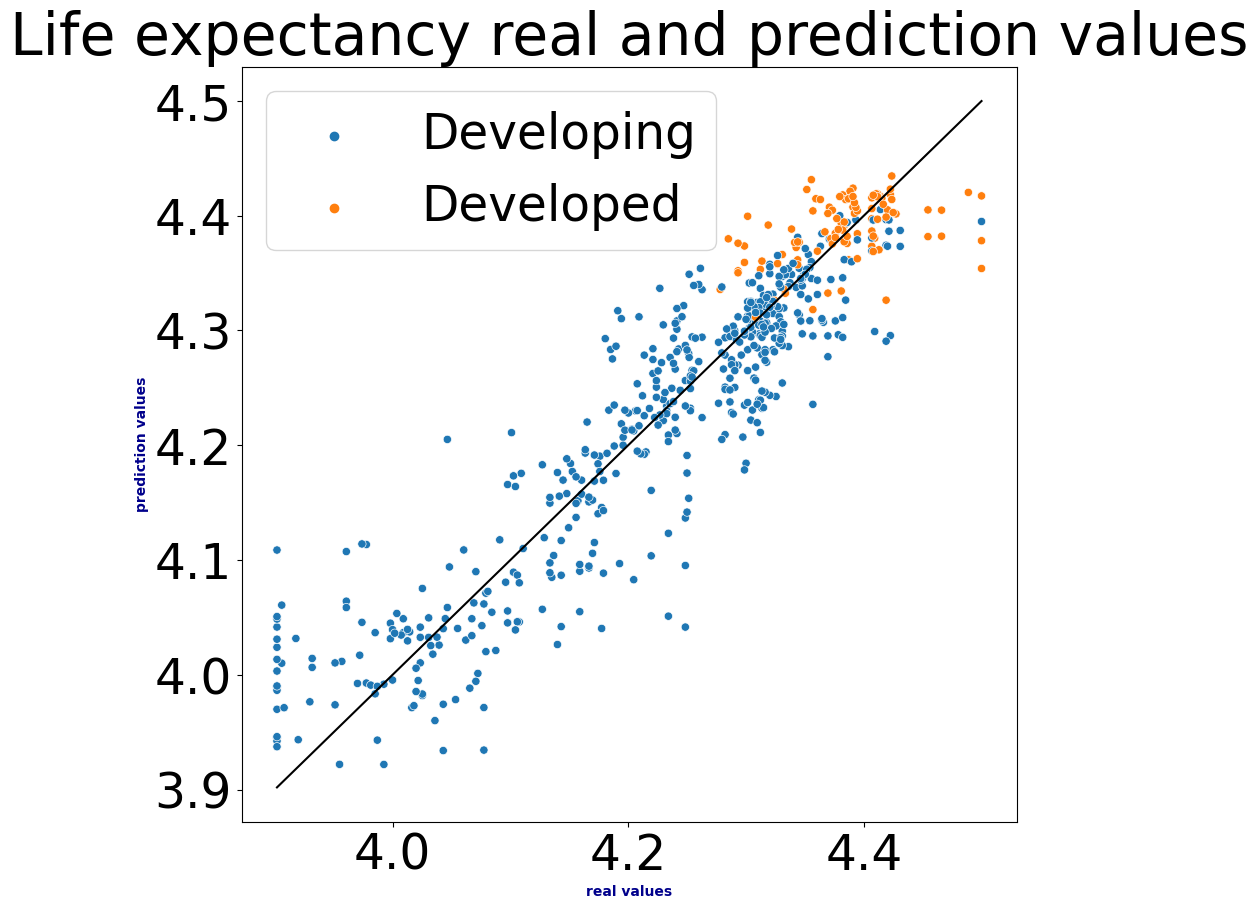

In [89]:
X_test = sm.add_constant(X_test)
Y_preds = model_1.predict(X_test)

plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(x=Y_test, y=Y_preds, hue=df["Status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.title("Life expectancy real and prediction values")
plt.xlabel("real values",fontdict=label_font)
plt.ylabel("prediction values",fontdict=label_font)
plt.show()

Prediction-2: Only with dummy varibles.

In [96]:
df_t = df_6.copy()
req_col = ["Developed","Developing","winsorize life expectancy"]

for i in df_t.columns:
  if i not in req_col:
    df_t.drop([i], inplace=True, axis=1)
df_t.columns

Index(['winsorize life expectancy', 'Developed', 'Developing'], dtype='object')

In [93]:
req_col = []
for i in df_t.columns:
  if i != "winsorize life expectancy":
    req_col.append(i)

In [103]:
Y = df_t["winsorize life expectancy"]
X = df_t[req_col]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print("number of train values: {}".format(X_train.shape[0]))
print("number of test values: {}".format(X_test.shape[0]))

number of train values: 2350
number of test values: 588


In [100]:
X_train = sm.add_constant(X_train)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize life expectancy   R-squared:                       0.210
Model:                                   OLS   Adj. R-squared:                  0.210
Method:                        Least Squares   F-statistic:                     390.7
Date:                       Wed, 07 Sep 2022   Prob (F-statistic):          3.76e-151
Time:                               15:49:02   Log-Likelihood:                 1948.4
No. Observations:                       2938   AIC:                            -3891.
Df Residuals:                           2935   BIC:                            -3873.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8657      0.002   1417.189      0.000       2.862       2.870
Developed      1.5176      0.004    402.484      0.000       1.510       1.525
Developing     1.3481      0.002    540.240      0.000       1.343       1.353
==============================================================================
Omnibus:                      241.469   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.693
Skew:                          -0.789   Prob(JB):                     6.87e-67
Kurtosis:                       3.012   Cond. No.                     1.11e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.17e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""